# Введение

<b><font size="4">Определение закономерностей определяющих успешность игры.</font></b>

Заказчик - интернет-магазин, продающий по всему миру компьютерные игры. Были получены исторические данные из открытых источников о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation) игр. Нужно выявить определяющие успешность игры закономерности для определения потенциально популярного продукта и планировки рекламных кампаний.

<b>План по выполнению проекта</b>

1. Открыть файл с данными и изучить общую информацию.
2. Выполнить подготовку данных:
    1. Проверить и обработать названия столбцов;
    2. Преобразуйте данные в нужные типы где это требуется. Описать, причины изменения типов данных;
    3. При необходимости обработать пропуски. Объяснить как выбирались данные для заполнения пропусков или почему пропуски не обрабатывались.
    4. Описать причины, которые могли привести к пропускам;
    5. Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.
3. Провести исследовательский анализ данных.
    1. Изучить, сколько игр выпускалось в разные годы. Определить важны ли данные за все периоды.
    2. Изучить, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Определить характерный срок появления новых и исчезновения старых платформ.
    3. Определить акутальный период для прогнозирования на 2017 год. Изучить данные за соответствующий актуальный период. Не учитывать в работе данные за предыдущие годы.
    4. Выяснить какие платформы лидируют по продажам, растут или падают. Выбрать несколько потенциально прибыльных платформ.
    5. Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
    6. Изучить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы.
    7. Соотнести получившиеся выводы с продажами игр на других платформах.
    8. Изучить общее распределение игр по жанрам. Выделить самые прибыльные жанры и жанры с высокими и низкими продажами.
4. Составьте портрет пользователя каждого региона
    Определить для пользователя каждого региона (NA, EU, JP):
    * Самые популярные платформы (топ-5). Описать различия в долях продаж.
    * Самые популярные жанры (топ-5). Пояснить разницу.
    * Влияние рейтинга ESRB на продажи.
5. Проверить следующие гипотезы:
    1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    3. Пояснить:
        * Как были сформулированы нулеваю и альтернативнаю гипотезы;
        * Какой критерий применялся для проверки гипотез и почему.
6. Написать общий вывод.

<b>Примечания</b>
* Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать;
* Данные представлены до 2016 года. Нужно отработать принцип работы с данными. Неважно, прогнозируются ли продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
* В наборе данных присутствует аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Изучение данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
pd.options.display.float_format = '{:.3f}'.format

In [3]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

Выведем общую информацию о датасете.

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,NaN


<b>Описание данных</b>

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB. Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Проверим нет ли в столбце 'Critic_Score' (оценки от критиков) дробных значений.

In [7]:
np.sort(df['Critic_Score'].unique())

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

Таких значений нет.

Выявлены следующие проблемы:
* Названия столбцов с большой буквы.
* Пропущенные значения в столбцах:
    * 'Name';
    * 'Year_of_Release';
    * 'Genre';
    * 'Critic_Score';
    * 'User_Score';
    * 'Rating'.
* Неверные типы данных в столбцах:
    * 'Year_of_Release' float на int (float64 появился из-за NaN);
    * 'Critic_Score' float на int (float64 появился из-за NaN);
    * 'User_Score object на float.

# Предобработка данных

In [8]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,NaN


## Общие исправления

<b>Приведем названия столбцов к нижнему регистру.</b>

In [9]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<b>Разберемся со значением tbd в столбце 'user_score' (рейтинг пользователей).</b>

In [10]:
df[df['user_score'] == 'tbd'].sort_values('na_sales', ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.000,Sports,3.450,2.590,0.000,0.660,NaN,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.150,0.180,0.000,0.070,73.000,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.000,Misc,2.080,1.350,0.000,0.540,61.000,tbd,E10+
881,Who wants to be a millionaire,PC,1999.000,Misc,1.940,0.000,0.000,0.000,NaN,tbd,E
645,uDraw Studio,Wii,2010.000,Misc,1.650,0.570,0.000,0.200,71.000,tbd,E


Абревиатура tbd расшифровается как to be determined, можно перевести как будет установлено (будет определено).

В данном случае скорее всего оценок пользователей слишком мало, чтобы сайт или агрегатор с которого бралась информацию публиковал оценку.

Можно заменить на NaN.

In [11]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df[df['user_score'] == 'tbd']['user_score'].count()

0

## Обработка пропусков

<b>Посмотрим на пропущенные данные столбцов 'name' и 'genre'.</b>

In [12]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.000,NaN,1.780,0.530,0.000,0.080,NaN,NaN,NaN
14244,NaN,GEN,1993.000,NaN,0.000,0.000,0.030,0.000,NaN,NaN,NaN


In [13]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.000,NaN,1.780,0.530,0.000,0.080,NaN,NaN,NaN
14244,NaN,GEN,1993.000,NaN,0.000,0.000,0.030,0.000,NaN,NaN,NaN


Таких значений всего два, они совпадают для обоих столбцов. Так как информации по ним очень мало, значений всего два, и обе игры были выпущены в 1993, а значит вряд ли будут релевантны для предсказаний на 2017 год - удалим строки.

In [14]:
df = df.dropna(subset=['name']).reset_index(drop=True)
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Пропуски в название и жанре скорее всего появились в результате ошибок в процессе сбора или выгрузки данных.

<b>Посмотрим на пропущенные данные столбца 'year_of_release'.</b>

In [15]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.260,0.260,0.010,0.710,94.000,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.590,2.360,0.040,0.510,84.000,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.800,0.970,0.000,0.290,74.000,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.570,1.020,0.000,0.410,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.360,0.140,0.000,0.030,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.010,0.000,0.000,0.000,43.000,NaN,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.010,0.000,0.000,0.000,69.000,6.5,T
16446,Inversion,PC,NaN,Shooter,0.010,0.000,0.000,0.000,59.000,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.010,0.000,0.000,0.000,NaN,NaN,NaN


In [16]:
print('Доля пропусков в столбце "year of release": ', round(df['year_of_release'].isna().sum() / len(df), 3) * 100,
      '%.', sep='')

Доля пропусков в столбце "year of release": 1.6%.


Так как для нас год выпуска является одним из ключевых параметров, для нас не важны данные игр с отсутсвующим годом выпуска. Этих значений меньше 2%, можем также их обросить.

In [17]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,NaN


<b>Посмотрим на пропущенные данные столбцов 'critic_score', 'user_score', 'rating'.</b>

In [18]:
print('Доля пропусков в столбце "critic_score": ', round(df['critic_score'].isna().sum() / len(df), 3) * 100,
      '%.', sep='')
print('Доля пропусков в столбце "user_score": ', round(df['user_score'].isna().sum() / len(df), 3) * 100,
      '%.', sep='')
print('Доля пропусков в столбце "rating": ', round(df['rating'].isna().sum() / len(df), 3) * 100,
      '%.', sep='')

Доля пропусков в столбце "critic_score": 51.5%.
Доля пропусков в столбце "user_score": 54.6%.
Доля пропусков в столбце "rating": 40.6%.


Пропущенных данных слишком много чтобы их отбросить.

Для столбца 'rating' заменим пропуски на 'unknown'.

In [19]:
df['rating'] = df['rating'].fillna('unknown')
df['rating'].isna().sum()

0

Для 'critic_score' и 'user_score' данных для заполнения этих столбцов нет. Оценки критиков и пользователей часто не свопадают, особенно для совеременных игр, поэтому не можем использовать данные одного столбца для заполнения другого.

## Изменение типов данных

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<b>Поменяем типы данных в столбцах 'year_of_release' и 'user_score'</b>

Не будем менять тип данных в 'critic_score' на int так как есть NaN и в целом дробные значения в этом столбце не будут влиять на дальнейший анализ.

In [21]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['user_score'] = df['user_score'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Проверим, что в столбце 'user_score' корректно переведен object во float.

In [22]:
np.sort(df['user_score'].unique())

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

Количество ненулевых объектов до и после совпадают, значения после выглядят нормально.

## Проверка значений в столбцах

In [23]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.360,28.960,3.770,8.450,76.000,8.000,E
1,Super Mario Bros.,NES,1985,Platform,29.080,3.580,6.810,0.770,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.680,12.760,3.790,3.290,82.000,8.300,E
3,Wii Sports Resort,Wii,2009,Sports,15.610,10.930,3.280,2.950,80.000,8.000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,unknown


<b>Столбец 'name'.</b>

Для более корректной проверки на дубликаты, приведем к нижнему змеиному регистру.

In [24]:
df['name'] = df['name'].str.lower().str.replace(' ', '_')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii_sports,Wii,2006,Sports,41.360,28.960,3.770,8.450,76.000,8.000,E
1,super_mario_bros.,NES,1985,Platform,29.080,3.580,6.810,0.770,NaN,NaN,unknown
2,mario_kart_wii,Wii,2008,Racing,15.680,12.760,3.790,3.290,82.000,8.300,E
3,wii_sports_resort,Wii,2009,Sports,15.610,10.930,3.280,2.950,80.000,8.000,E
4,pokemon_red/pokemon_blue,GB,1996,Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,unknown


Значения смотреть не будем, т.к. много уникальных категориальных значений и нельзя проверить их правильность.

<b>Столбец 'platform'.</b>

Для более корректной проверки на дубликаты, приведем к нижнему регистру.

In [25]:
df['platform'] = df['platform'].str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii_sports,wii,2006,Sports,41.360,28.960,3.770,8.450,76.000,8.000,E
1,super_mario_bros.,nes,1985,Platform,29.080,3.580,6.810,0.770,NaN,NaN,unknown
2,mario_kart_wii,wii,2008,Racing,15.680,12.760,3.790,3.290,82.000,8.300,E
3,wii_sports_resort,wii,2009,Sports,15.610,10.930,3.280,2.950,80.000,8.000,E
4,pokemon_red/pokemon_blue,gb,1996,Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,unknown


In [26]:
df['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

Аномальные значения не обнаружены.

<b>Столбец 'year_of_release'.</b>

In [27]:
df['year_of_release'].value_counts().sort_index()

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

Аномальные значения не обнаружены.

<b>Столбец 'genre'.</b>

Для более корректной проверки на дубликаты, приведем к нижнему регистру.

In [28]:
df['genre'] = df['genre'].str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii_sports,wii,2006,sports,41.360,28.960,3.770,8.450,76.000,8.000,E
1,super_mario_bros.,nes,1985,platform,29.080,3.580,6.810,0.770,NaN,NaN,unknown
2,mario_kart_wii,wii,2008,racing,15.680,12.760,3.790,3.290,82.000,8.300,E
3,wii_sports_resort,wii,2009,sports,15.610,10.930,3.280,2.950,80.000,8.000,E
4,pokemon_red/pokemon_blue,gb,1996,role-playing,11.270,8.890,10.220,1.000,NaN,NaN,unknown


In [29]:
df['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

Аномальные значения не обнаружены.

<b>Столбцы 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'.</b>

In [30]:
print(df['na_sales'].value_counts().sort_index().head())
print(df['na_sales'].value_counts().sort_index().tail())

0.000    4449
0.010     530
0.020     562
0.030     554
0.040     543
Name: na_sales, dtype: int64
15.680    1
23.200    1
26.930    1
29.080    1
41.360    1
Name: na_sales, dtype: int64


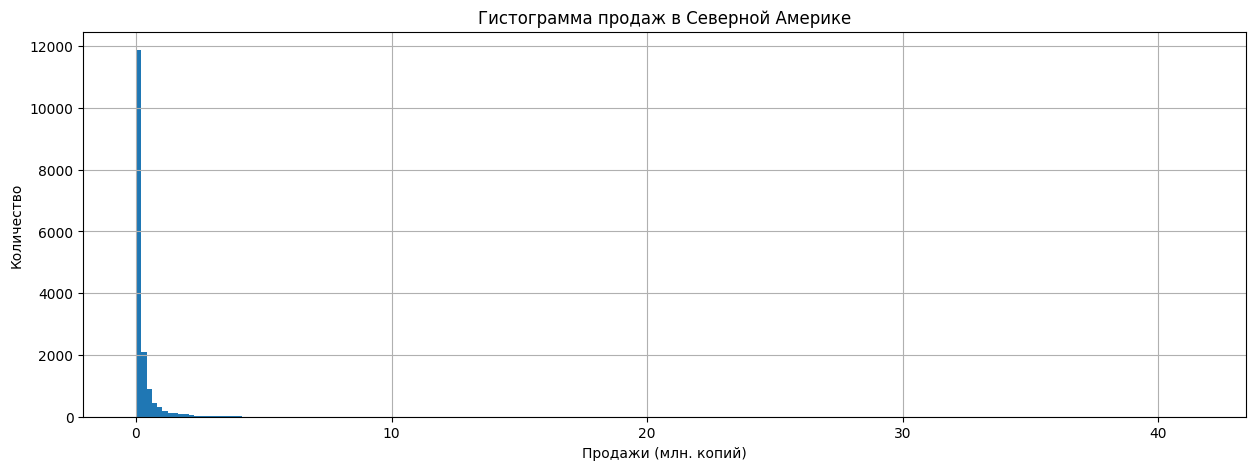

In [31]:
ax = df['na_sales'].hist(bins=200, figsize=(15, 5))

ax.set_title('Гистограмма продаж в Северной Америке')
ax.set_xlabel('Продажи (млн. копий)')
ax.set_ylabel('Количество')
plt.show()

Аномальные значения не обнаружены.

In [32]:
print(df['eu_sales'].value_counts().sort_index().head())
print(df['eu_sales'].value_counts().sort_index().tail())

0.000    5766
0.010    1467
0.020    1290
0.030     911
0.040     702
Name: eu_sales, dtype: int64
9.200     1
10.930    1
10.950    1
12.760    1
28.960    1
Name: eu_sales, dtype: int64


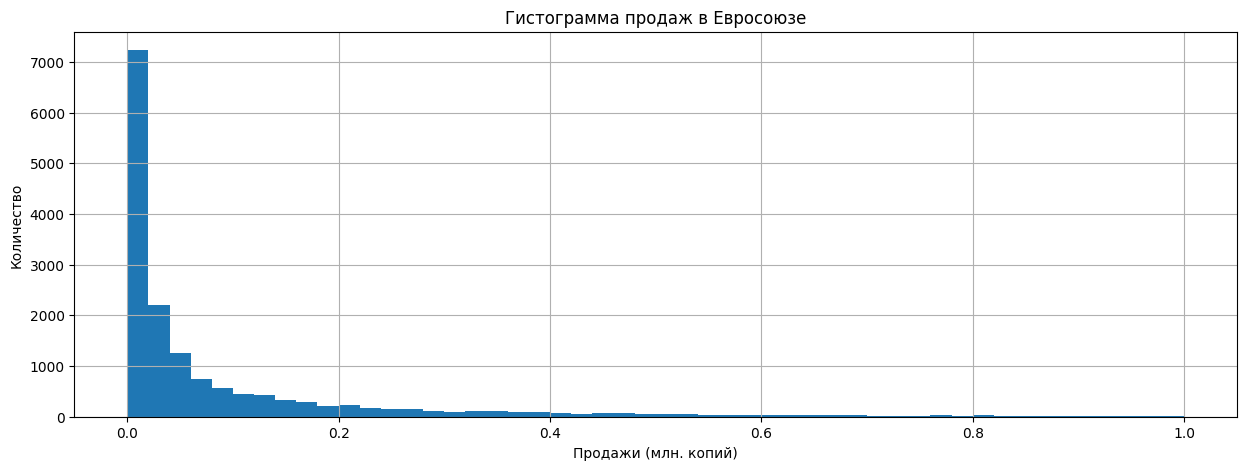

In [33]:
ax = df['eu_sales'].hist(bins=50, figsize=(15, 5), range=(0, 1))

ax.set_title('Гистограмма продаж в Евросоюзе')
ax.set_xlabel('Продажи (млн. копий)')
ax.set_ylabel('Количество')
plt.show()

Аномальные значения не обнаружены.

In [34]:
print(df['jp_sales'].value_counts().sort_index().head())
print(df['jp_sales'].value_counts().sort_index().tail())

0.000    10300
0.010      697
0.020      733
0.030      540
0.040      391
Name: jp_sales, dtype: int64
6.040     1
6.500     1
6.810     1
7.200     1
10.220    1
Name: jp_sales, dtype: int64


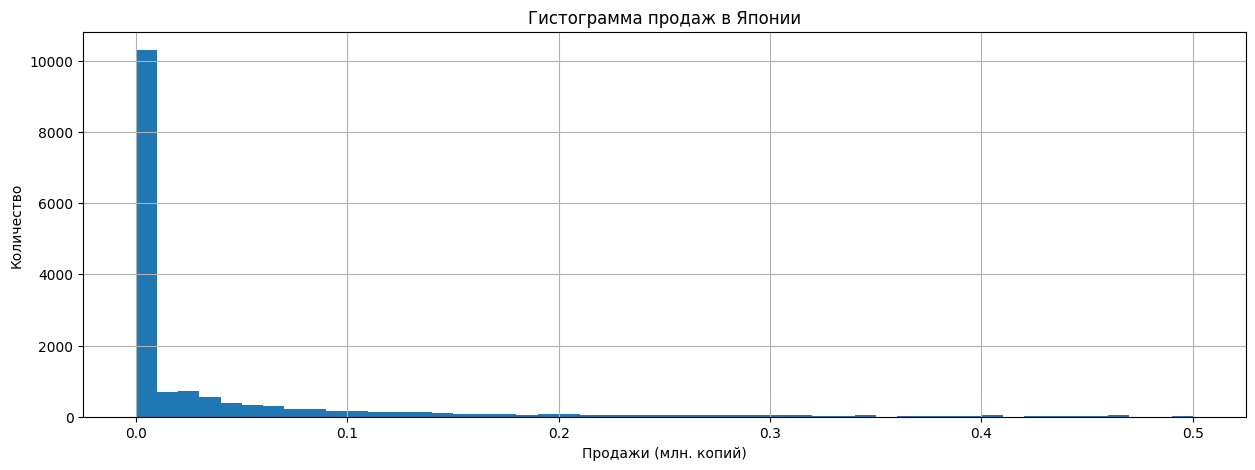

In [35]:
ax = df['jp_sales'].hist(bins=50, figsize=(15, 5), range=(0, 0.5))

ax.set_title('Гистограмма продаж в Японии')
ax.set_xlabel('Продажи (млн. копий)')
ax.set_ylabel('Количество')
plt.show()

Аномальные значения не обнаружены.

In [36]:
print(df['other_sales'].value_counts().sort_index().head())
print(df['other_sales'].value_counts().sort_index().tail())

0.000    6492
0.010    3398
0.020    1596
0.030     910
0.040     641
Name: other_sales, dtype: int64
3.290     1
3.960     1
7.530     1
8.450     1
10.570    1
Name: other_sales, dtype: int64


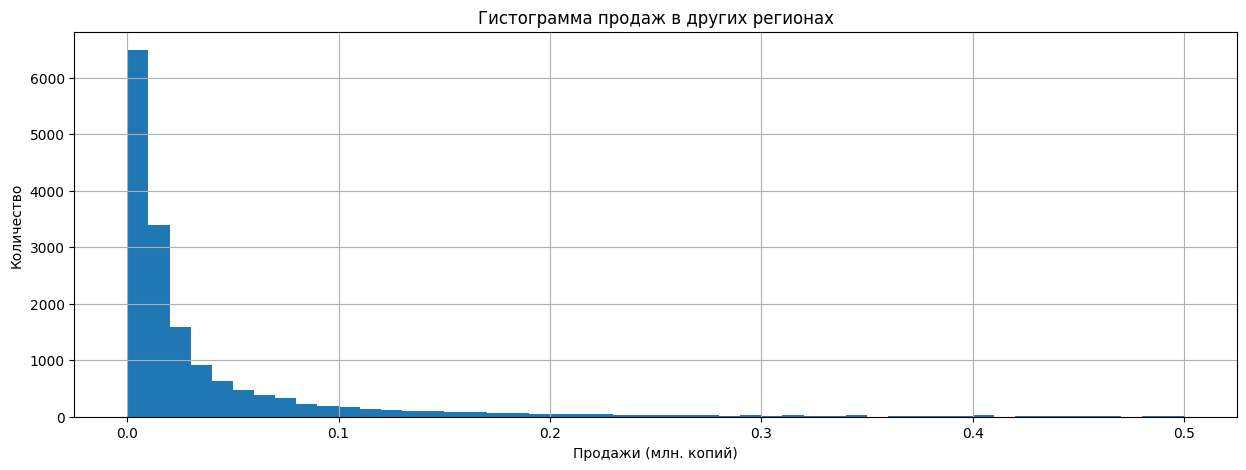

In [37]:
ax = df['other_sales'].hist(bins=50, figsize=(15, 5), range=(0, 0.5))

ax.set_title('Гистограмма продаж в других регионах')
ax.set_xlabel('Продажи (млн. копий)')
ax.set_ylabel('Количество')
plt.show()

Аномальные значения не обнаружены.

<b>Столбец 'critic_score'.</b>

In [38]:
np.sort(df['critic_score'].unique())

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

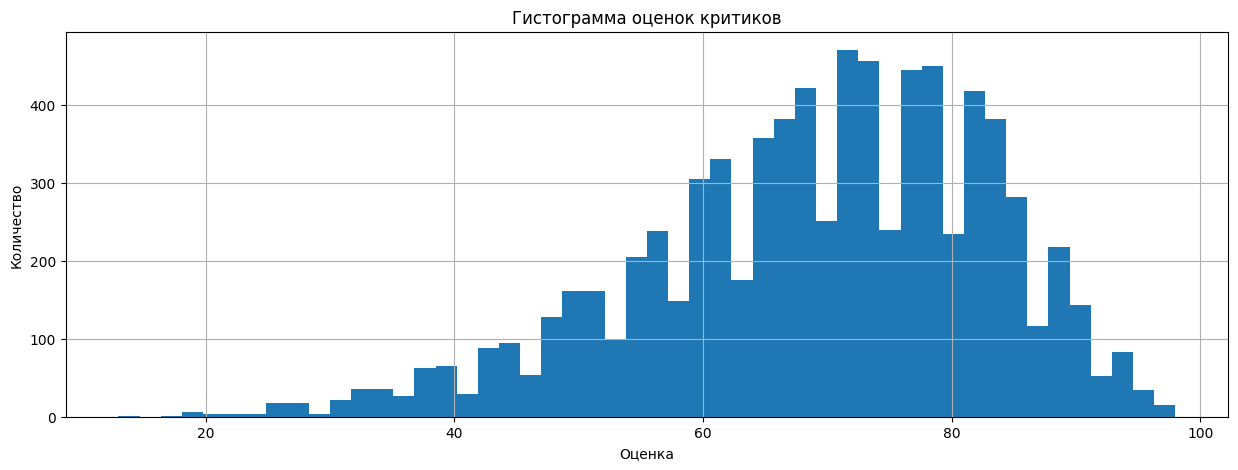

In [39]:
ax = df['critic_score'].hist(bins=50, figsize=(15, 5))

ax.set_title('Гистограмма оценок критиков')
ax.set_xlabel('Оценка')
ax.set_ylabel('Количество')
plt.show()

Аномальные значения не обнаружены.

<b>Столбец 'user_score'.</b>

In [40]:
np.sort(df['user_score'].unique())

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

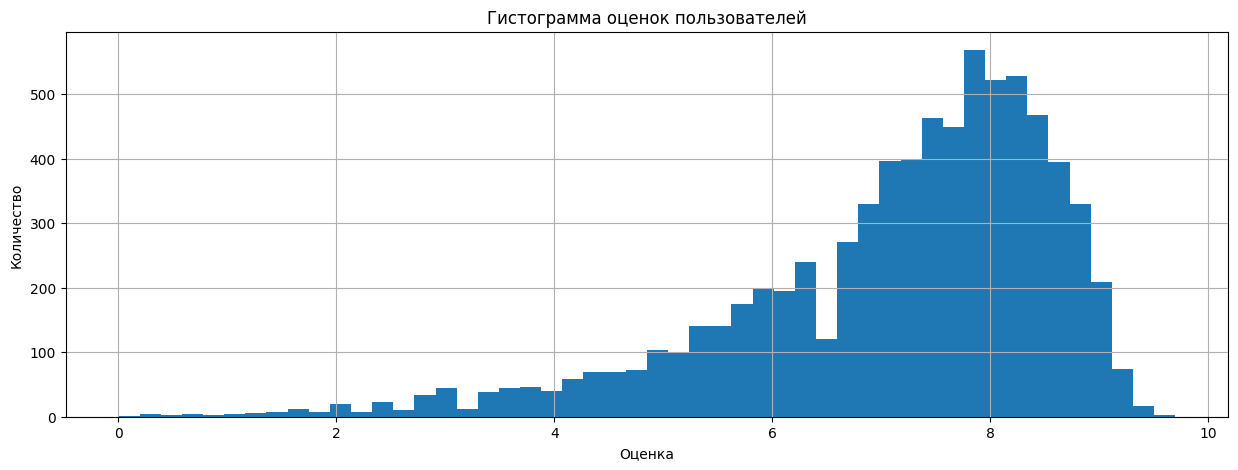

In [41]:
ax = df['user_score'].hist(bins=50, figsize=(15, 5))

ax.set_title('Гистограмма оценок пользователей')
ax.set_xlabel('Оценка')
ax.set_ylabel('Количество')
plt.show()

Аномальные значения не обнаружены.

<b>Столбец 'rating'.</b>

In [42]:
df['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

Аномальные значения не обнаружены.

## Проверка на дубликаты

<b>Проверим на дубликаты.</b>

In [43]:
df.duplicated().sum()

0

Полных дубликатов нет.

Проверим на дуликаты по ключевым параметрам.

In [44]:
df[df.duplicated(subset=['name', 'platform'], keep=False)].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,madden_nfl_13,ps3,2012,sports,2.110,0.220,0.000,0.230,83.000,5.500,E
15969,madden_nfl_13,ps3,2012,sports,0.000,0.010,0.000,0.000,83.000,5.500,E
1177,need_for_speed:_most_wanted,x360,2012,racing,0.620,0.780,0.010,0.150,83.000,8.500,T
1574,need_for_speed:_most_wanted,x360,2005,racing,1.000,0.130,0.020,0.100,83.000,8.500,T
5883,need_for_speed:_most_wanted,pc,2005,racing,0.020,0.230,0.000,0.040,82.000,8.500,T
11534,need_for_speed:_most_wanted,pc,2012,racing,0.000,0.060,0.000,0.020,82.000,8.500,T


Игру Need for Speed: Most Wanted трогать не будем, т.к. скорее всего это переиздание, судя по году. Для игры Madden сложим ненулевые показатели и удалим дубликаты.

In [45]:
df.loc[df[(df['name'] == 'madden_nfl_13') & (df['platform'] == 'ps3')].iloc[[0]].index.item(), 'eu_sales'] += \
df.loc[df[(df['name'] == 'madden_nfl_13') & (df['platform'] == 'ps3')].iloc[[1]].index.item(), 'eu_sales']

df = df.drop(df[(df['name'] == 'madden_nfl_13') & (df['platform'] == 'ps3')].iloc[[1]].index.item())


In [46]:
df[df.duplicated(subset=['name', 'platform'], keep=False)].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1177,need_for_speed:_most_wanted,x360,2012,racing,0.620,0.780,0.010,0.150,83.000,8.500,T
1574,need_for_speed:_most_wanted,x360,2005,racing,1.000,0.130,0.020,0.100,83.000,8.500,T
5883,need_for_speed:_most_wanted,pc,2005,racing,0.020,0.230,0.000,0.040,82.000,8.500,T
11534,need_for_speed:_most_wanted,pc,2012,racing,0.000,0.060,0.000,0.020,82.000,8.500,T


## Создание столбца глобальных продаж

Создадим отдельный столбец с глобальными продажами игр.

In [47]:
df['global_sales'] = (df['na_sales'] + df['eu_sales'] +
                               df['jp_sales'] + df['other_sales'])
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,wii_sports,wii,2006,sports,41.360,28.960,3.770,8.450,76.000,8.000,E,82.540
1,super_mario_bros.,nes,1985,platform,29.080,3.580,6.810,0.770,NaN,NaN,unknown,40.240
2,mario_kart_wii,wii,2008,racing,15.680,12.760,3.790,3.290,82.000,8.300,E,35.520
3,wii_sports_resort,wii,2009,sports,15.610,10.930,3.280,2.950,80.000,8.000,E,32.770
4,pokemon_red/pokemon_blue,gb,1996,role-playing,11.270,8.890,10.220,1.000,NaN,NaN,unknown,31.380
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,samurai_warriors:_sanada_maru,ps3,2016,action,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010
16440,lma_manager_2007,x360,2006,sports,0.000,0.010,0.000,0.000,NaN,NaN,unknown,0.010
16441,haitaka_no_psychedelica,psv,2016,adventure,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010
16442,spirits_&_spells,gba,2003,platform,0.010,0.000,0.000,0.000,NaN,NaN,unknown,0.010


## Вывод

* Названия столбцов приведены к нижнему регистру.
* TBD в столбце 'user_score' заменен на np.NaN.
* Обработаны пропуски, добавлено значение-заглушка 'unknown' в столбце 'rating'.
* Изменены типы данные:
    * В столбце 'year_of_release' float на int;
    * В столбце 'user_score' obj на float.
* Выполнена проверка на полные и неявные дубликаты, дубликаты обработаны.
* Создан столбец с суммарными глобальными продажами игр.

# Исследовательский анализ данных

In [48]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,wii_sports,wii,2006,sports,41.360,28.960,3.770,8.450,76.000,8.000,E,82.540
1,super_mario_bros.,nes,1985,platform,29.080,3.580,6.810,0.770,NaN,NaN,unknown,40.240
2,mario_kart_wii,wii,2008,racing,15.680,12.760,3.790,3.290,82.000,8.300,E,35.520
3,wii_sports_resort,wii,2009,sports,15.610,10.930,3.280,2.950,80.000,8.000,E,32.770
4,pokemon_red/pokemon_blue,gb,1996,role-playing,11.270,8.890,10.220,1.000,NaN,NaN,unknown,31.380
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,samurai_warriors:_sanada_maru,ps3,2016,action,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010
16440,lma_manager_2007,x360,2006,sports,0.000,0.010,0.000,0.000,NaN,NaN,unknown,0.010
16441,haitaka_no_psychedelica,psv,2016,adventure,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010
16442,spirits_&_spells,gba,2003,platform,0.010,0.000,0.000,0.000,NaN,NaN,unknown,0.010


## Анализ количества игр по годам выпуска

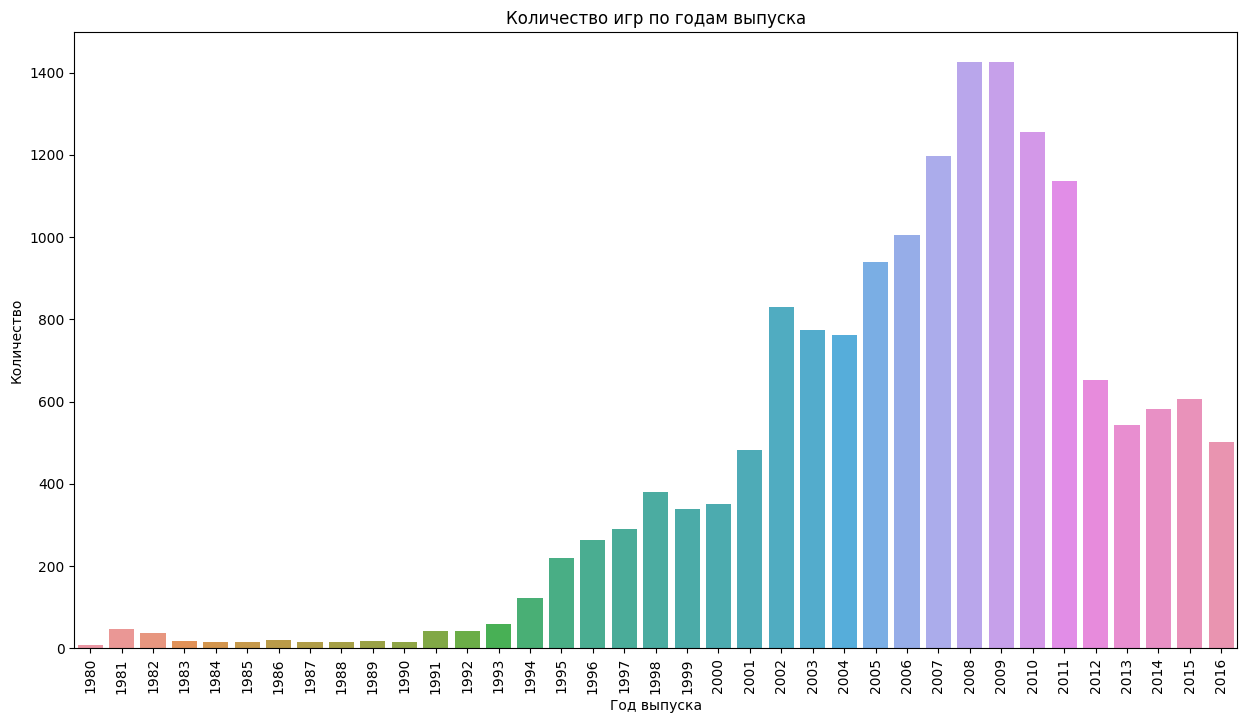

In [49]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation='vertical')
plot = pd.pivot_table(df, values='name', index='year_of_release', aggfunc='count').reset_index()
sns.barplot(data=plot, x=plot['year_of_release'], y=plot['name']).set(title=('Количество игр по годам выпуска'), xlabel='Год выпуска', ylabel='Количество')
plt.show()

Отметим, что до 1995 года выпускалось очень мало игр по сравнению с последними годами. Можем убрать эти данные из рассмотрения.

## Анализ продаж игр на различных платформах

In [50]:
df_platf_gr = (pd.pivot_table(df, values='global_sales', index='platform', aggfunc='sum').
                     sort_values(by='global_sales', ascending=False).reset_index())
df_platf_gr.columns = ['platform', 'global_sales_sum']

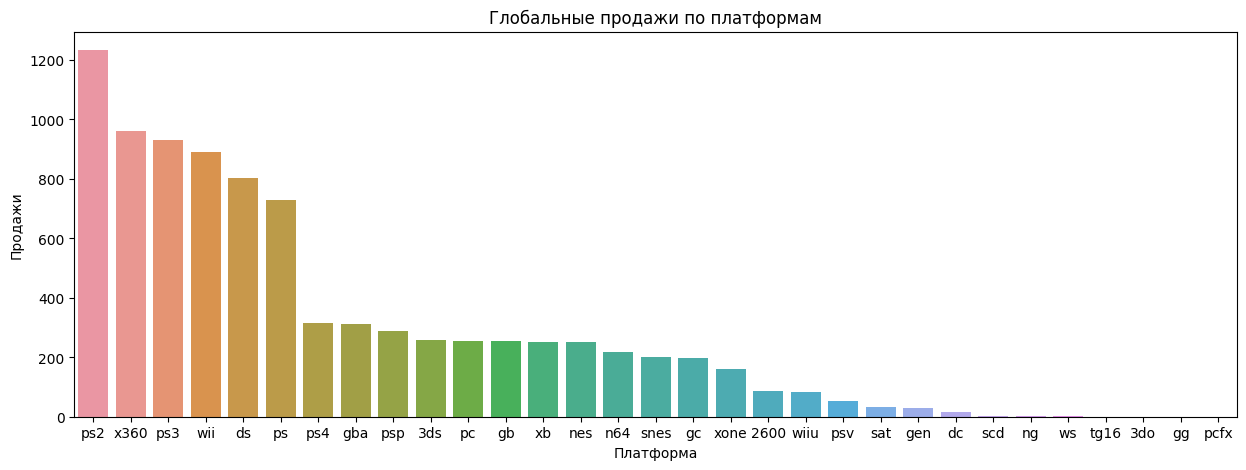

In [51]:
df_platf_gr
plt.figure(figsize=(15, 5))
sns.barplot(x='platform', y='global_sales_sum', data=df_platf_gr).set(title=('Глобальные продажи по платформам'),
                                      xlabel='Платформа', ylabel='Продажи')
plt.show()

Выделяются первые 6 платформ, дальше идёт резкий спад в продажах.

При построение графиков было замечено аномальное значение для Nintendo DS, одна игра выпущенная в 1985 году. Удалим это значение и перестроим графики.

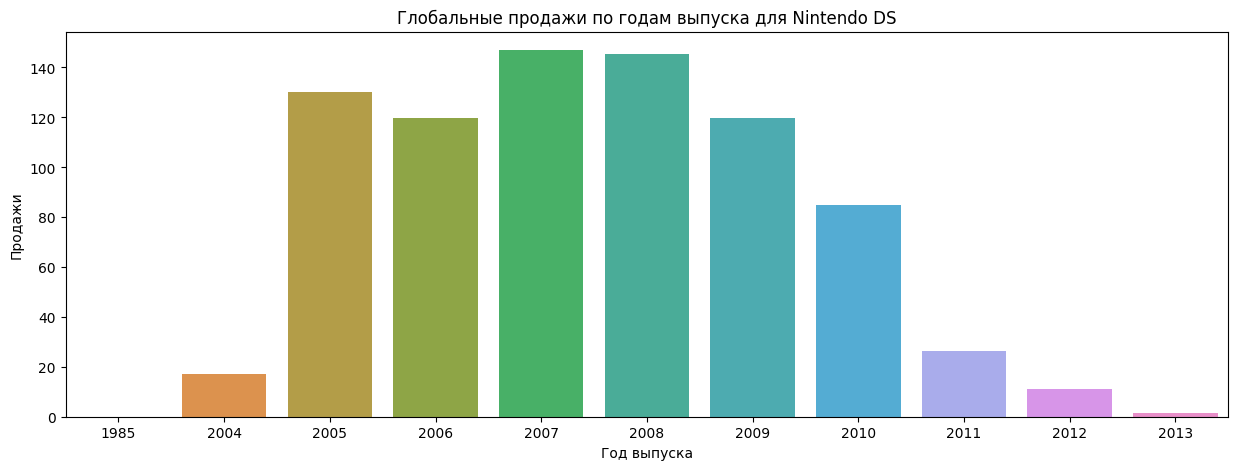

In [52]:
plt.figure(figsize=(15, 5))
plot = df[df['platform'] == 'ds'].groupby('year_of_release')['global_sales'].sum()
sns.barplot(x=plot.index, y=plot).set(title=('Глобальные продажи по годам выпуска для Nintendo DS'),
                                      xlabel='Год выпуска', ylabel='Продажи')
plt.show()

In [53]:
df[(df['platform'] == 'ds') & (df['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
15704,strongest_tokyo_university_shogi_ds,ds,1985,action,0.000,0.000,0.020,0.000,NaN,NaN,unknown,0.020


In [54]:
df = df.drop(df[(df['platform'] == 'ds') & (df['year_of_release'] == 1985)].index.item())

In [55]:
df[(df['platform'] == 'ds') & (df['year_of_release'] == 1985)]['name'].count()

0

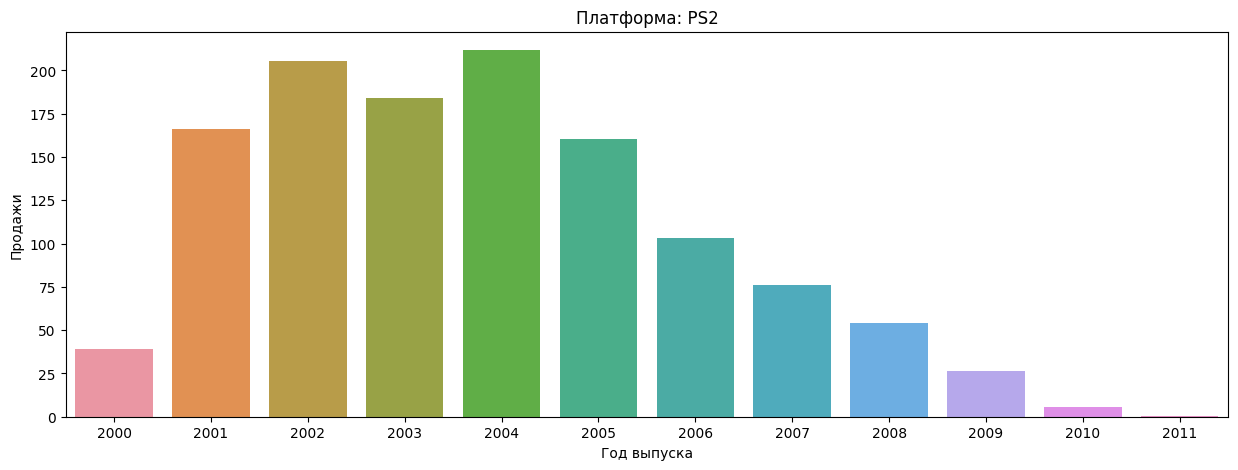

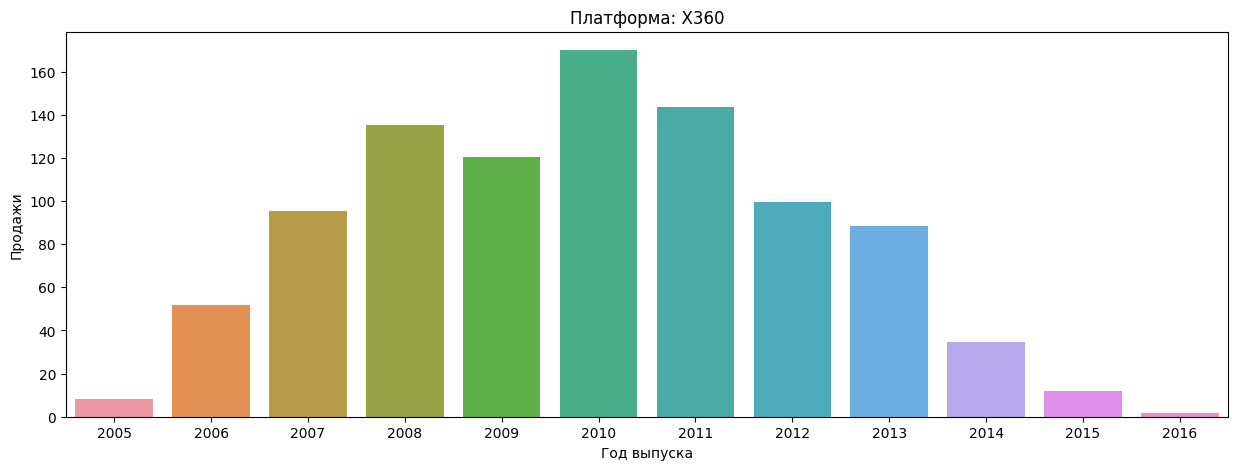

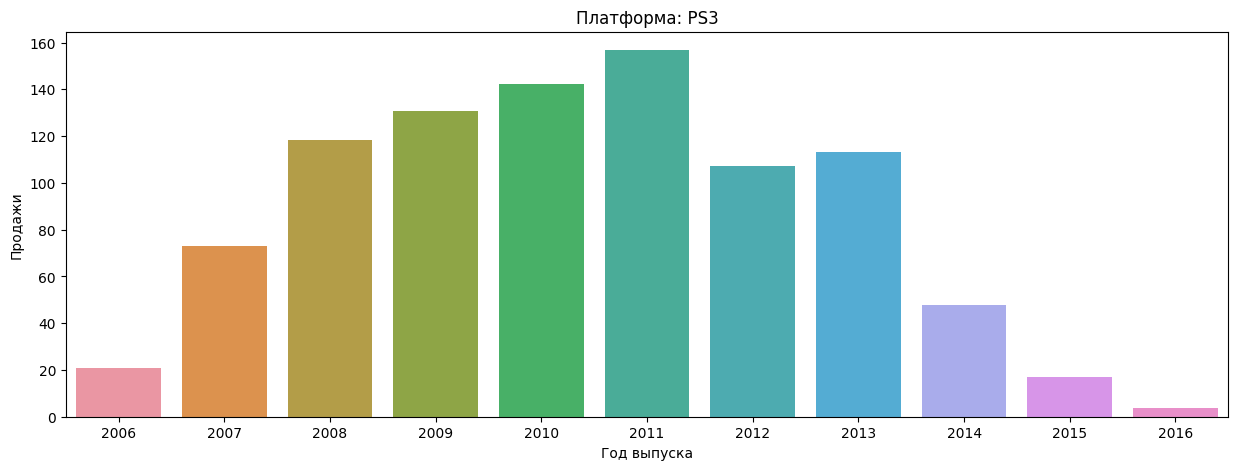

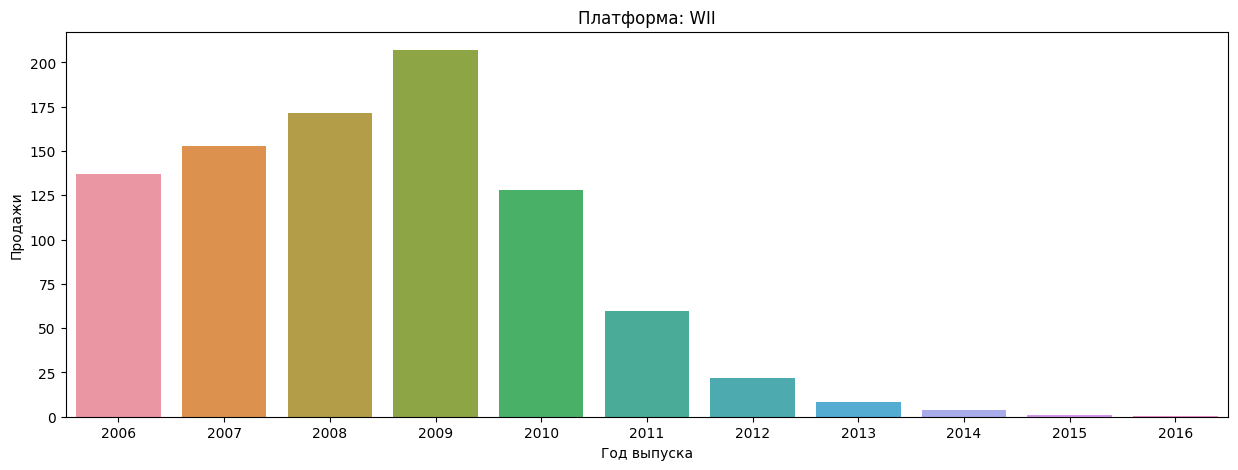

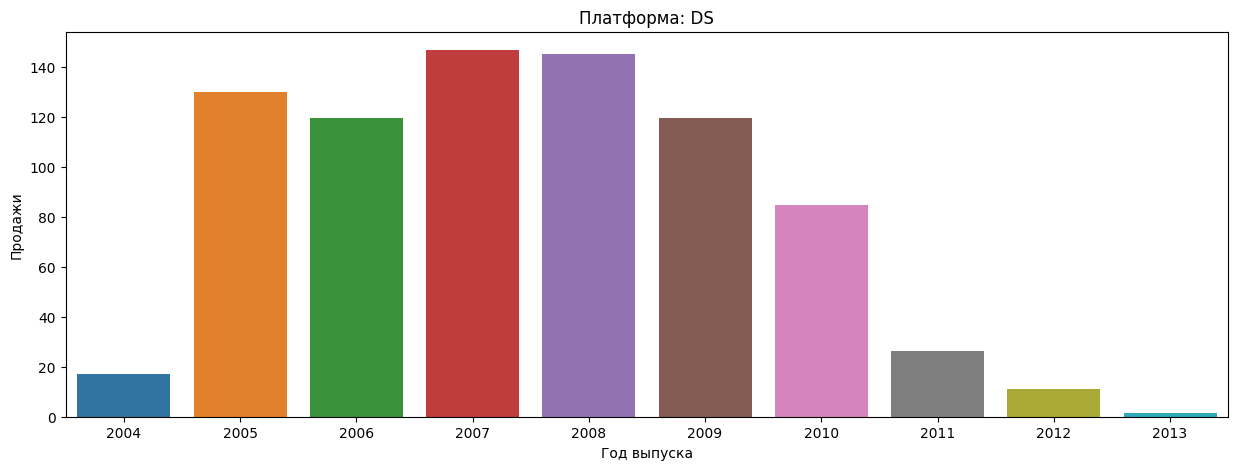

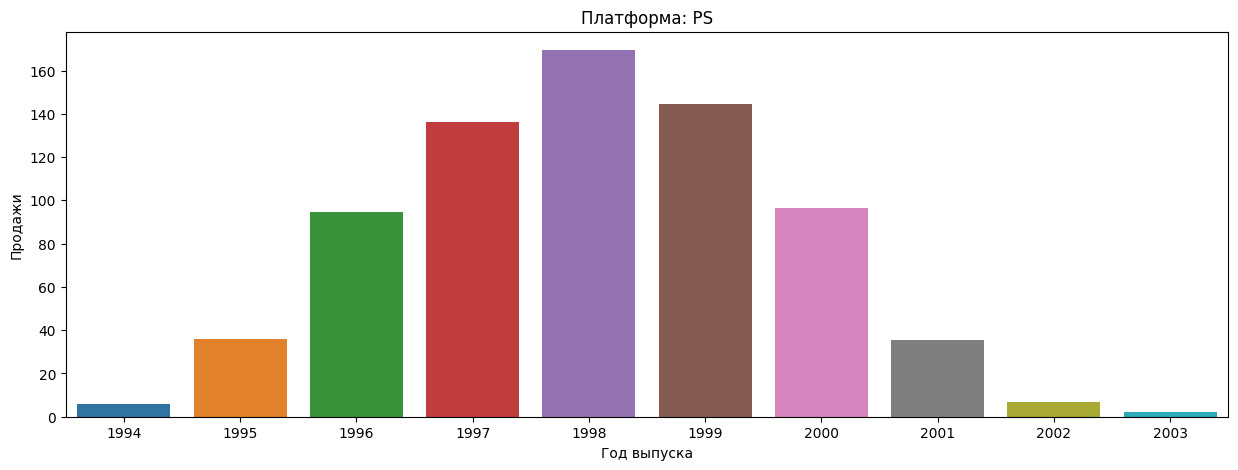

Среднее количество лет продаж игр на ТОП-5 платформах: 11.0


In [56]:
platf_month_list = []

for i in range(0, 6):
    plt.figure(figsize=(15, 5))
    plot = (df[df['platform'] == df_platf_gr.loc[i, 'platform']].
            groupby('year_of_release')['global_sales'].sum())
    _ = df_platf_gr.loc[i, 'platform'].upper()
    sns.barplot(x=plot.index, y=plot).set(title=(f'Платформа: {_}'), xlabel='Год выпуска', ylabel='Продажи')
    plt.show()

    platf_month_list.append(df[df['platform'] == df_platf_gr.loc[i, 'platform']].
                           groupby('year_of_release')['name'].count().count())

print('Среднее количество лет продаж игр на ТОП-5 платформах:', np.mean(platf_month_list))

При этом наиболее активно продажи идут 5-7 лет.

## Определение актуального периода

In [57]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,wii_sports,wii,2006,sports,41.360,28.960,3.770,8.450,76.000,8.000,E,82.540
1,super_mario_bros.,nes,1985,platform,29.080,3.580,6.810,0.770,NaN,NaN,unknown,40.240
2,mario_kart_wii,wii,2008,racing,15.680,12.760,3.790,3.290,82.000,8.300,E,35.520
3,wii_sports_resort,wii,2009,sports,15.610,10.930,3.280,2.950,80.000,8.000,E,32.770
4,pokemon_red/pokemon_blue,gb,1996,role-playing,11.270,8.890,10.220,1.000,NaN,NaN,unknown,31.380
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,samurai_warriors:_sanada_maru,ps3,2016,action,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010
16440,lma_manager_2007,x360,2006,sports,0.000,0.010,0.000,0.000,NaN,NaN,unknown,0.010
16441,haitaka_no_psychedelica,psv,2016,adventure,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010
16442,spirits_&_spells,gba,2003,platform,0.010,0.000,0.000,0.000,NaN,NaN,unknown,0.010


Посмотрим какие платформы ещё актуальны в 2016 году.

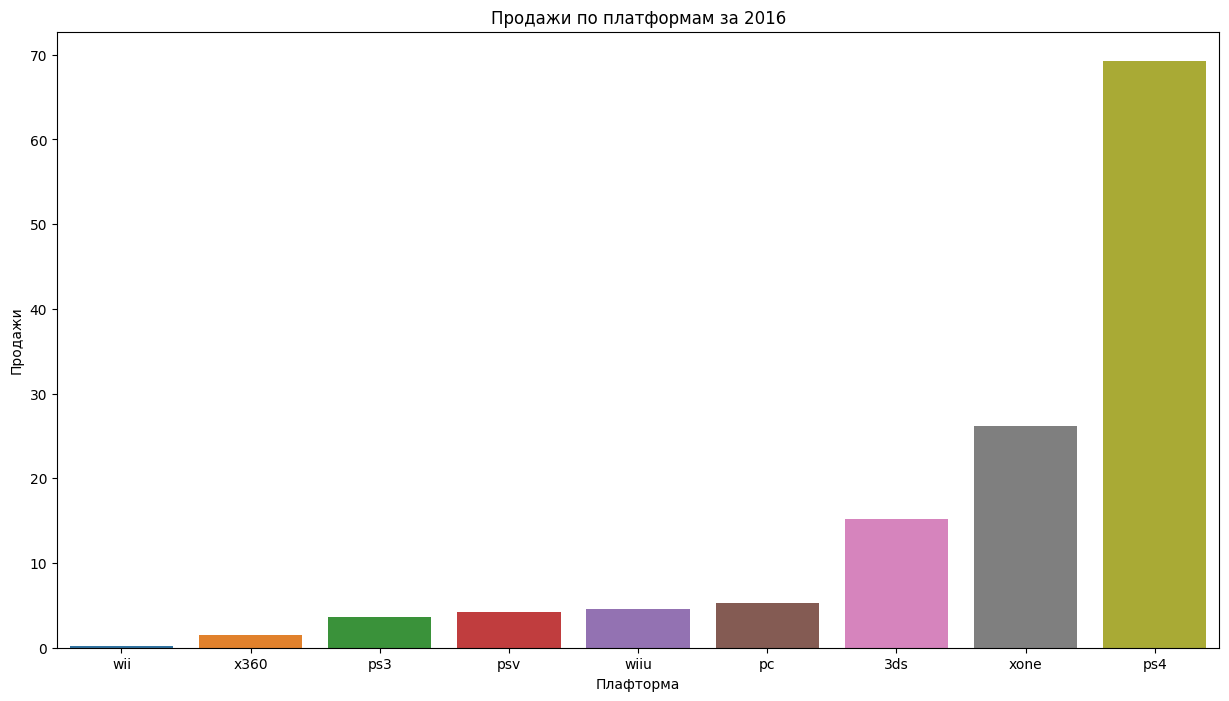

In [58]:
plt.figure(figsize=(15, 8))
plot = df[df['year_of_release'] == 2016].groupby('platform')['global_sales'].sum().sort_values()
sns.barplot(x=plot.index, y=plot).set(title=(f'Продажи по платформам за 2016'), xlabel='Плафторма', ylabel='Продажи')
plt.show()

Отметим, что большая часть продаж пришлась на консоли нового поколения (PS4, XBox One, Nintendo 3DS) и персональные компьютеры.

Исключим из рассмотрения PC и Wii так как персональный компьютер - это общее название всех поколений компьютеров, а Wii уже мало актуальная.

In [59]:
platf_2016 = df[(df['year_of_release'] == 2016) & (~df['platform'].isin(['pc', 'wii']))]['platform'].unique().tolist()
platf_2016

['ps4', '3ds', 'xone', 'wiiu', 'ps3', 'x360', 'psv']

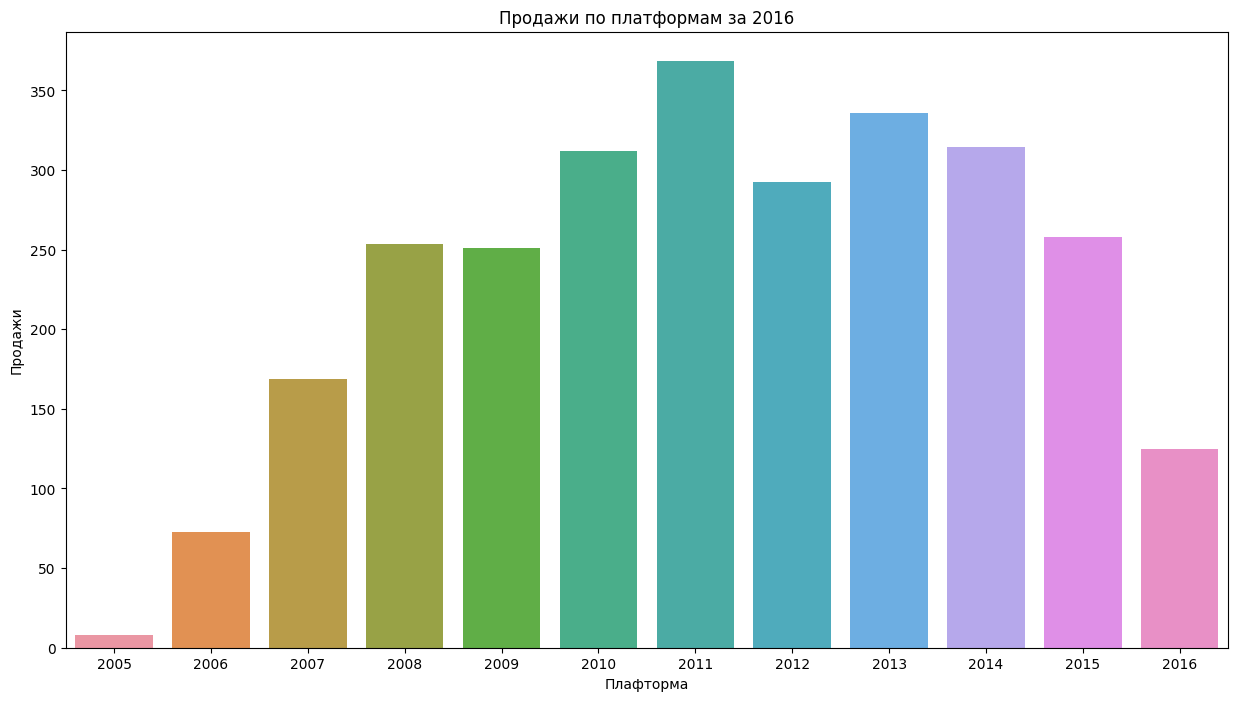

In [60]:
plt.figure(figsize=(15, 8))
plot = df[df['platform'].isin(platf_2016)].groupby('year_of_release')['global_sales'].sum().sort_index()
sns.barplot(x=plot.index, y=plot).set(title=(f'Продажи по платформам за 2016'), xlabel='Плафторма', ylabel='Продажи')
plt.show()

Заметим, что первая игра на консоли, на которые до сих пор выходят игры, вышла в 2005 году, а заметные продажи начались 2007 года. При этом к 2016 продажи сильно снизились.

Посмотрим топ 3 консолей по продажам за 2016 и рассмотрим продажи для этих консолей в другие годы.

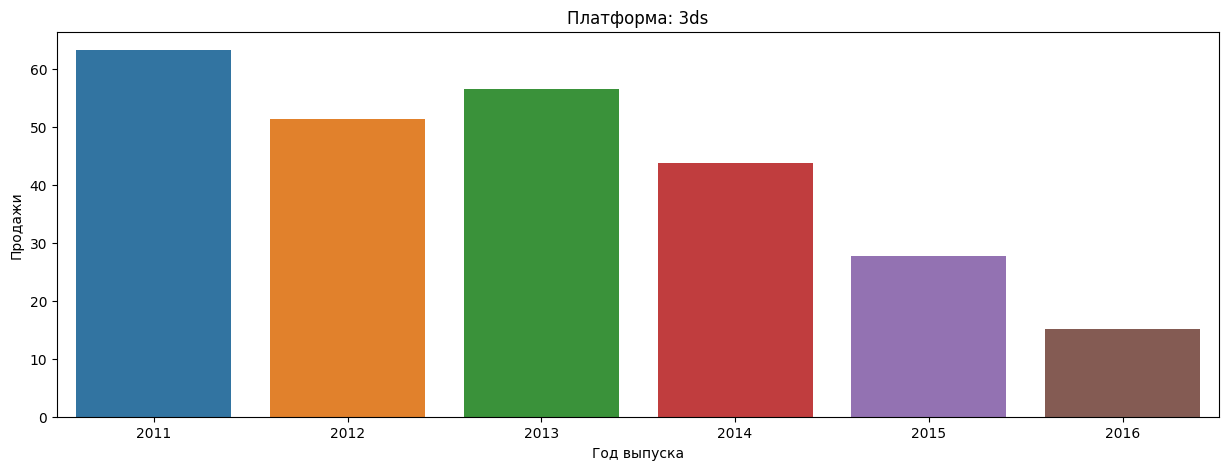

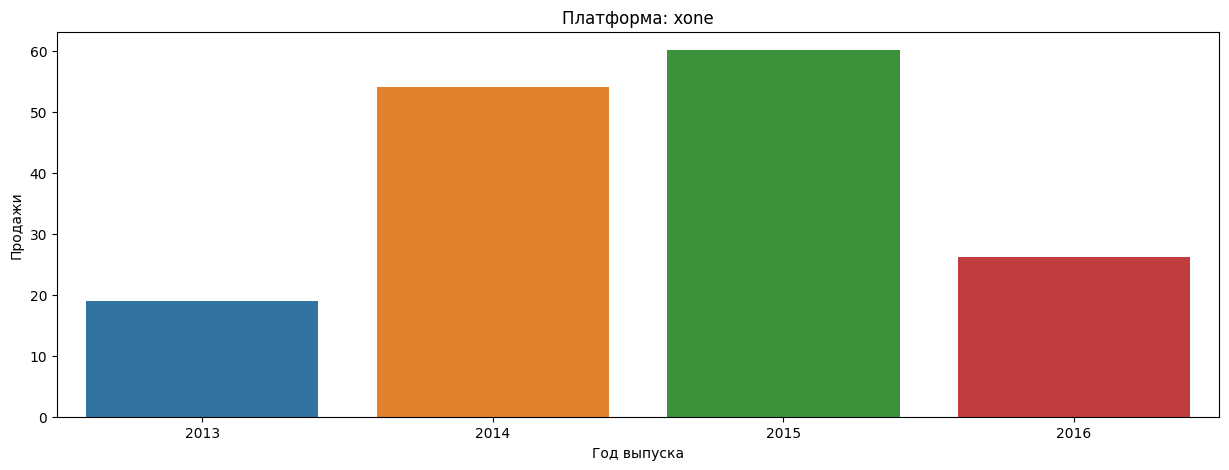

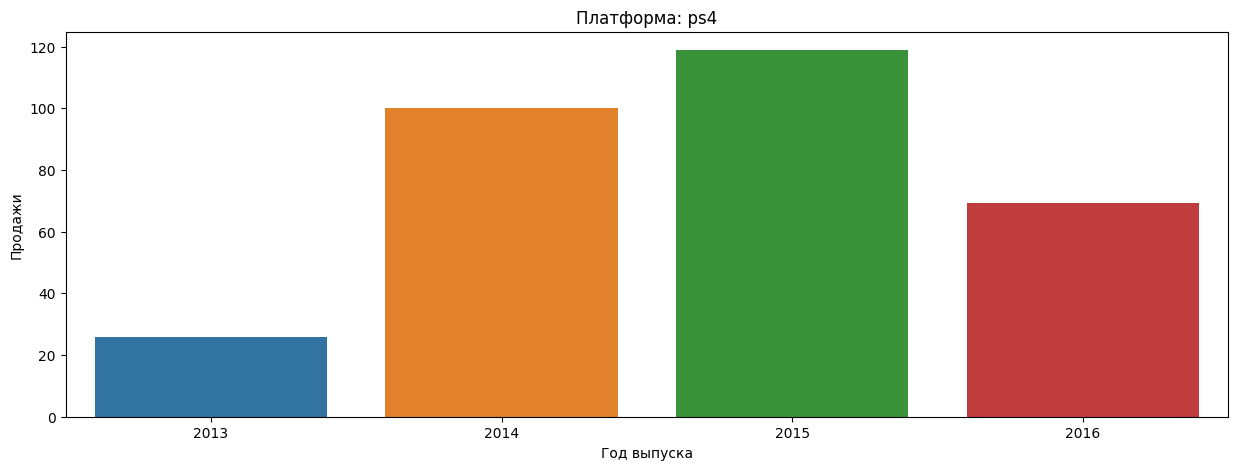

In [61]:
_ = ['3ds', 'xone', 'ps4']
for platform in _:
    plt.figure(figsize=(15, 5))
    plot = (df[df['platform'] == platform].groupby('year_of_release')['global_sales'].sum())
    sns.barplot(x=plot.index, y=plot).set(title=(f'Платформа: {platform}'), xlabel='Год выпуска', ylabel='Продажи')

Заметим, что для PlayStation 4 и XBox One - первый год выпуска 2013, при этом большие продажи начались с 2014 года.

Отметим, что игровой рынок быстро развивающийся и динамично меняющийся, с учетом этой информации и пунктов 4.2 и 4.1 установим актуальный период с 2014 по 2016 год.

## Анализ актуального периода

Создадим датафрейм актуального периода и отфильтруем только те платформы, игры на которые выхожили в 2016 году.

In [62]:
platf_current = df[df['year_of_release'] == 2016]['platform'].unique().tolist()
print(platf_current)

df_filt = df[(df['year_of_release'] >= 2014) & (df['platform'].isin(platf_current))].reset_index(drop=True)
display(df_filt)

['ps4', '3ds', 'xone', 'wiiu', 'ps3', 'pc', 'x360', 'psv', 'wii']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,call_of_duty:_black_ops_3,ps4,2015,shooter,6.030,5.860,0.360,2.380,NaN,NaN,unknown,14.630
1,grand_theft_auto_v,ps4,2014,action,3.960,6.310,0.380,1.970,97.000,8.300,M,12.620
2,pokemon_omega_ruby/pokemon_alpha_sapphire,3ds,2014,role-playing,4.350,3.490,3.100,0.740,NaN,NaN,unknown,11.680
3,fifa_16,ps4,2015,sports,1.120,6.120,0.060,1.280,82.000,4.300,E,8.580
4,star_wars_battlefront_(2015),ps4,2015,shooter,2.990,3.490,0.220,1.280,NaN,NaN,unknown,7.980
...,...,...,...,...,...,...,...,...,...,...,...,...
1671,strawberry_nauts,psv,2016,adventure,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010
1672,aiyoku_no_eustia,psv,2014,misc,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010
1673,samurai_warriors:_sanada_maru,ps3,2016,action,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010
1674,haitaka_no_psychedelica,psv,2016,adventure,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010


### Анализ продаж игр на актуальных платформах

In [63]:
df_filt_gr_sales_sum = pd.pivot_table(df_filt, values='global_sales', index=['platform', 'year_of_release'],
                                   aggfunc='sum').reset_index()
df_filt_gr_sales_sum.columns = ['platform', 'year_of_release', 'sales_sum']
df_filt_gr_sales_sum

,platform,year_of_release,sales_sum
0,3ds,2014,43.760
1,3ds,2015,27.780
2,3ds,2016,15.140
3,pc,2014,13.280
4,pc,2015,8.520
5,pc,2016,5.250
6,ps3,2014,47.760
7,ps3,2015,16.820
8,ps3,2016,3.600
9,ps4,2014,100.000


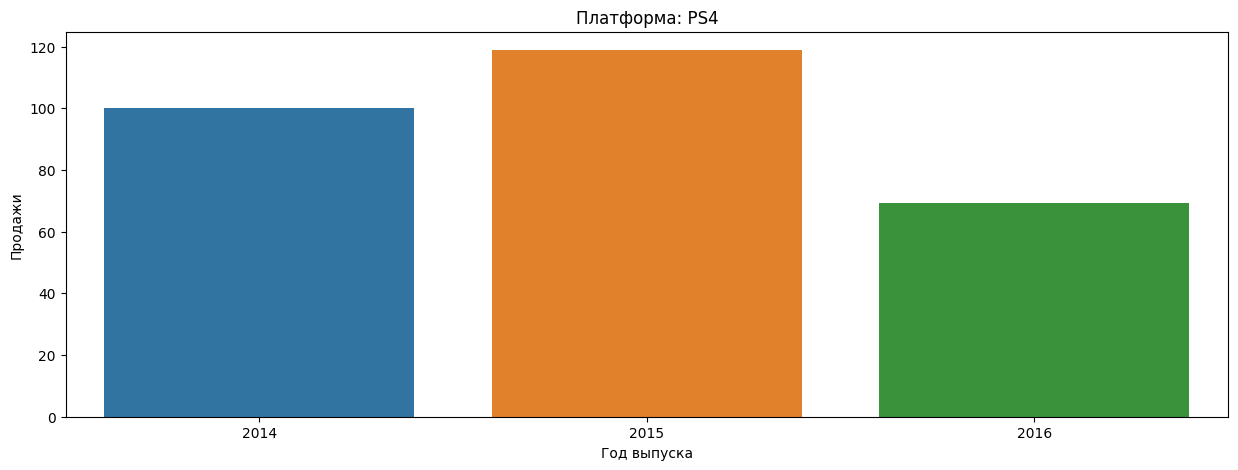

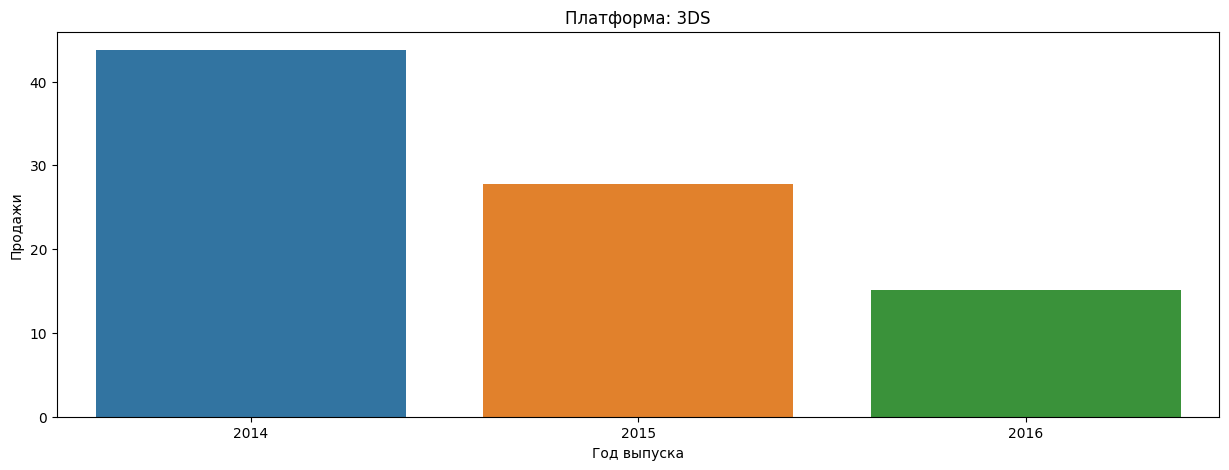

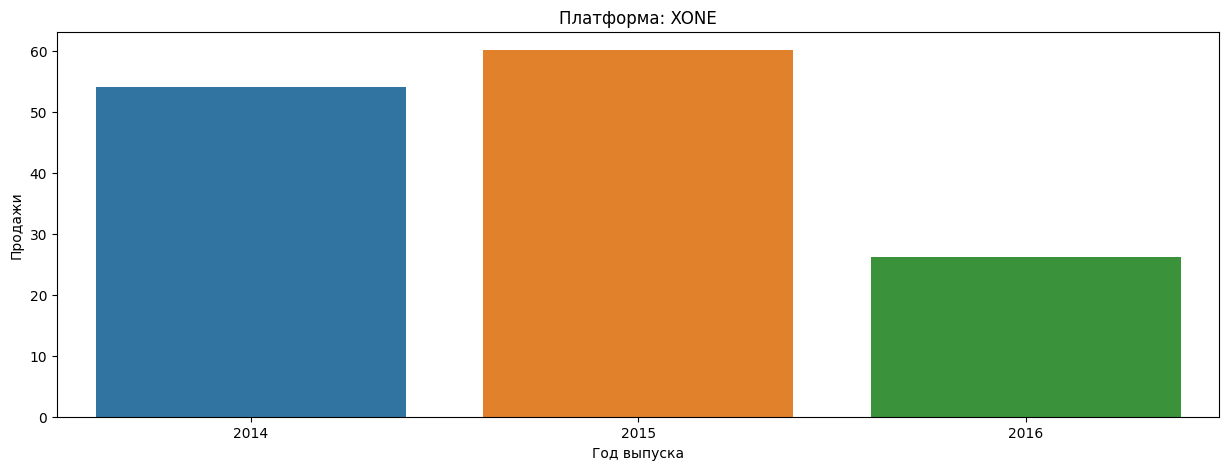

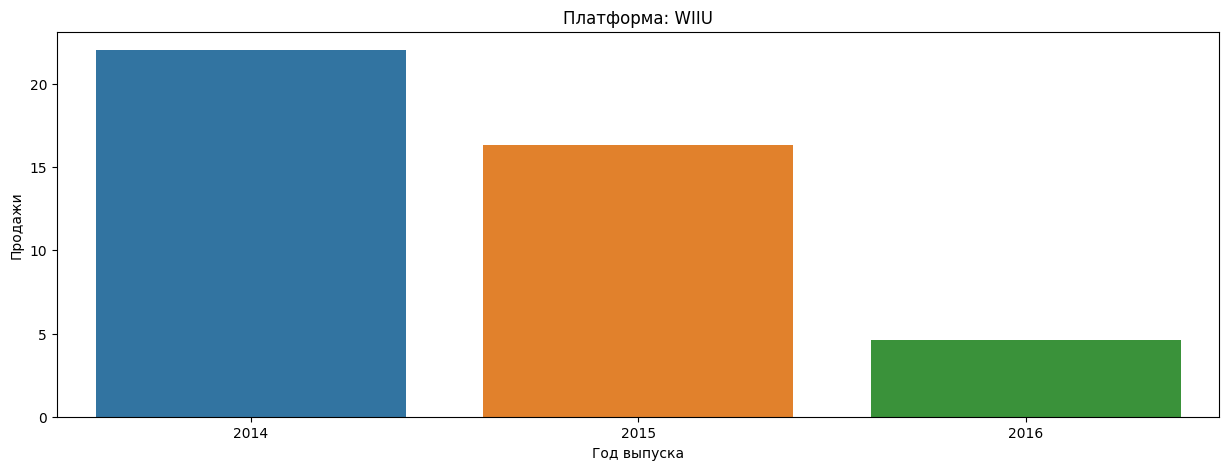

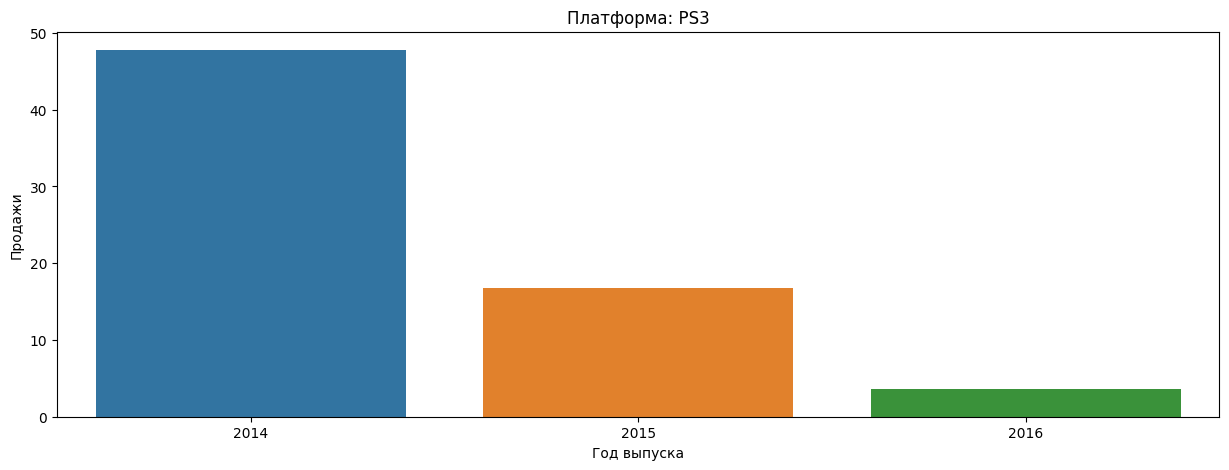

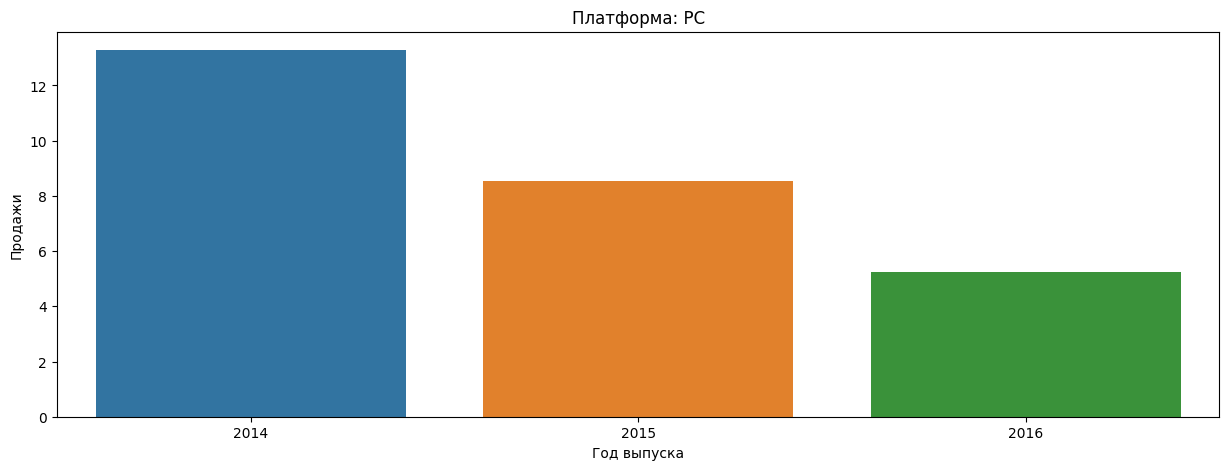

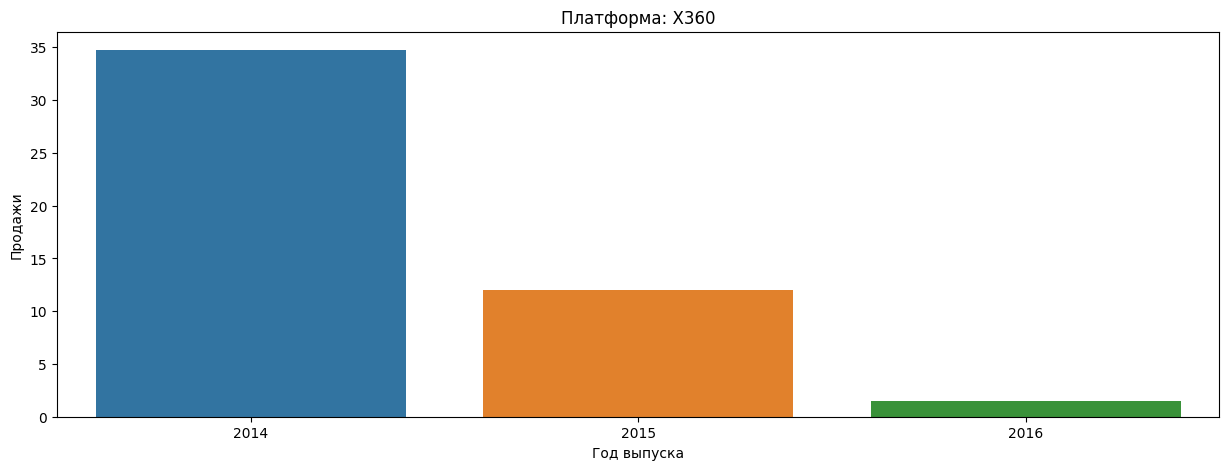

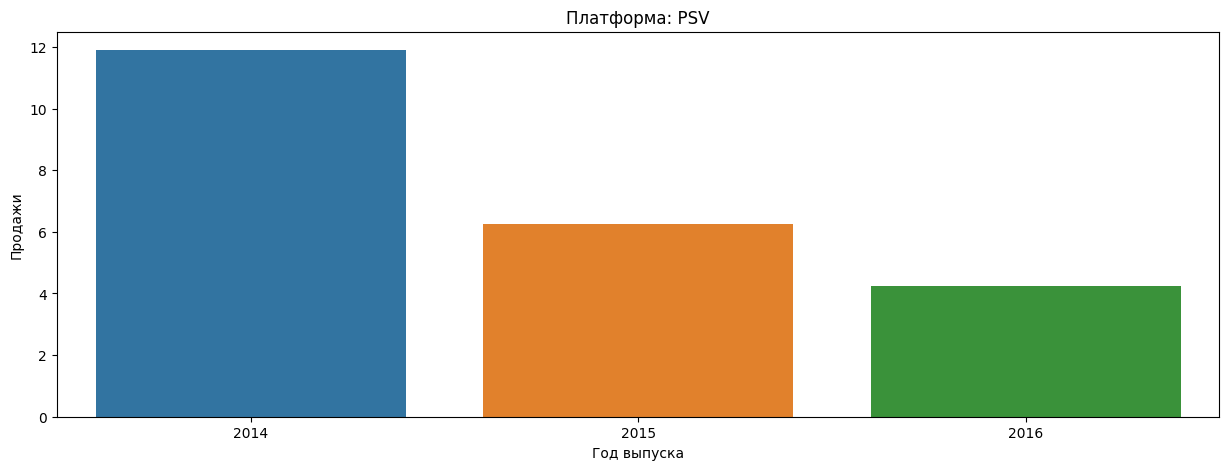

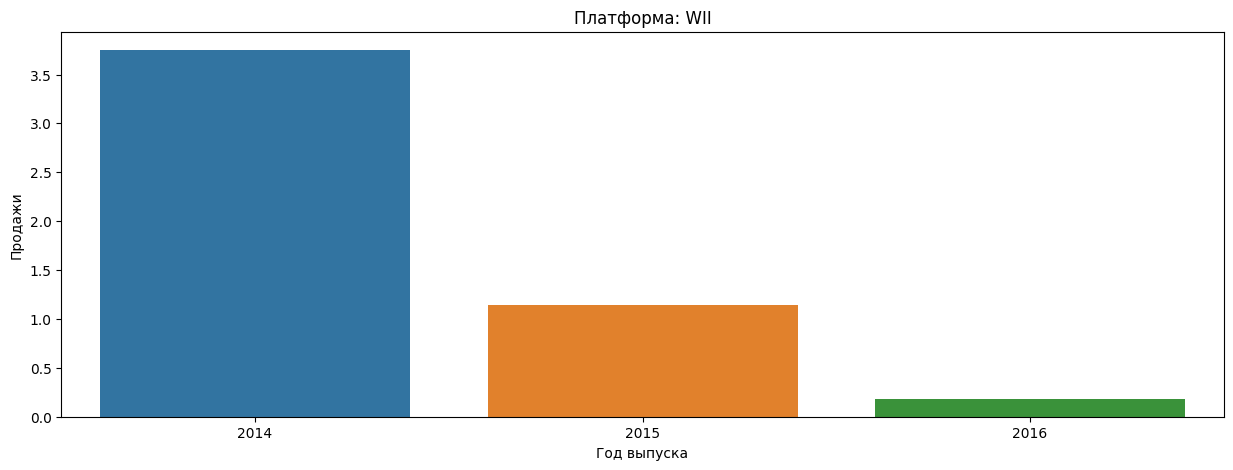

In [64]:
for platform in platf_current:
    plt.figure(figsize=(15, 5))
    (sns.barplot(data=df_filt_gr_sales_sum[df_filt_gr_sales_sum['platform'] == platform], x='year_of_release', y='sales_sum').
     set(title=(f'Платформа: {platform.upper()}'), xlabel='Год выпуска', ylabel='Продажи'), )
    plt.show()

Видим общий тренд на снижение продаж.
Тренд наиболее значителен для платформ старого поколения таких как:
* Wii;
* PlayStation 3;
* XBox 360;
* WiiU.

Наиболее перспективные платформы:
* PlayStation 4
* XBox One
* Nintendo 3DS

Также можно рассмотреть:
* PC
* PlayStation Vita
* WiiU

### Анализ глобальных продаж на актуальных платформах

Для каждой платформы построим график "ящик с усами".

,psv,pc,3ds,ps3,x360,wii,ps4,wiiu,xone
count,295.000,151.000,212.000,219.000,111.000,11.000,376.000,73.000,228.000
mean,0.076,0.179,0.409,0.311,0.434,0.461,0.766,0.589,0.616
std,0.142,0.329,1.188,0.633,0.629,0.625,1.615,1.161,1.047
min,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010
25%,0.020,0.020,0.030,0.040,0.070,0.035,0.057,0.050,0.050
50%,0.040,0.060,0.090,0.110,0.180,0.180,0.185,0.190,0.205
75%,0.090,0.200,0.250,0.325,0.505,0.755,0.690,0.570,0.633
max,1.960,3.050,11.680,5.270,4.280,2.010,14.630,7.090,7.390


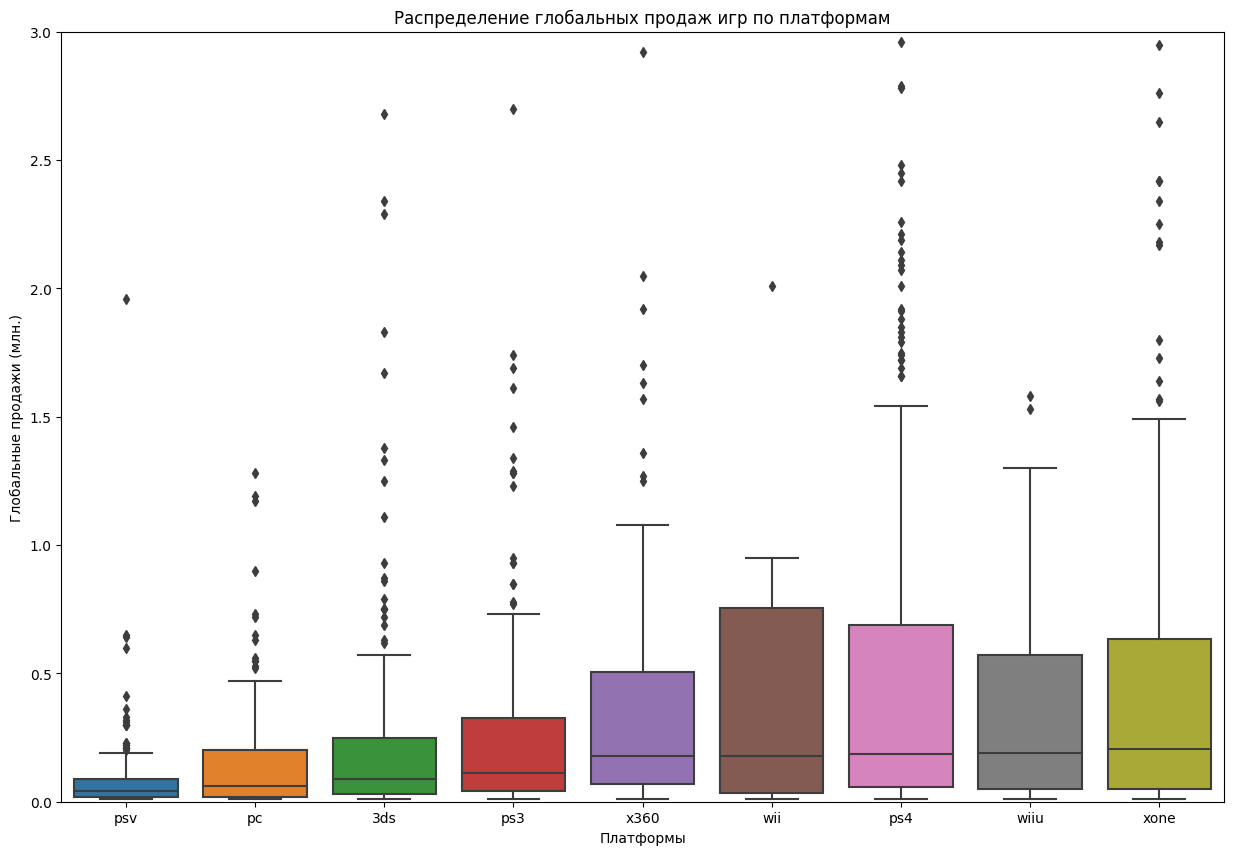

In [65]:
#Датафрейм описаний
df_platf_sales_desc = pd.DataFrame()

for platform in platf_current:
    df_platf_sales_desc[platform] = df_filt[df_filt['platform'] == platform]['global_sales'].describe()
df_platf_sales_desc = df_platf_sales_desc.sort_values(by='50%', axis=1)
display(df_platf_sales_desc)

#График
order = df_platf_sales_desc.columns.to_list()
plt.figure(figsize=(15, 10))
(sns.boxplot(data=df_filt, x='platform', y='global_sales', order=order).
 set(title='Распределение глобальных продаж игр по платформам',
     xlabel='Платформы', ylabel='Глобальные продажи (млн.)', ylim=(0, 3)))
plt.show()

Отметим, что платформы c лучшими глобальными продажами это:
* XBox 360
* PS 3
* PS 4
* XBox One

У них высокая медиана продаж, высокое значение 3 квартиля, а также верхнего "уса" графика.

### Анализ влияние оценок на платформу XBox 360

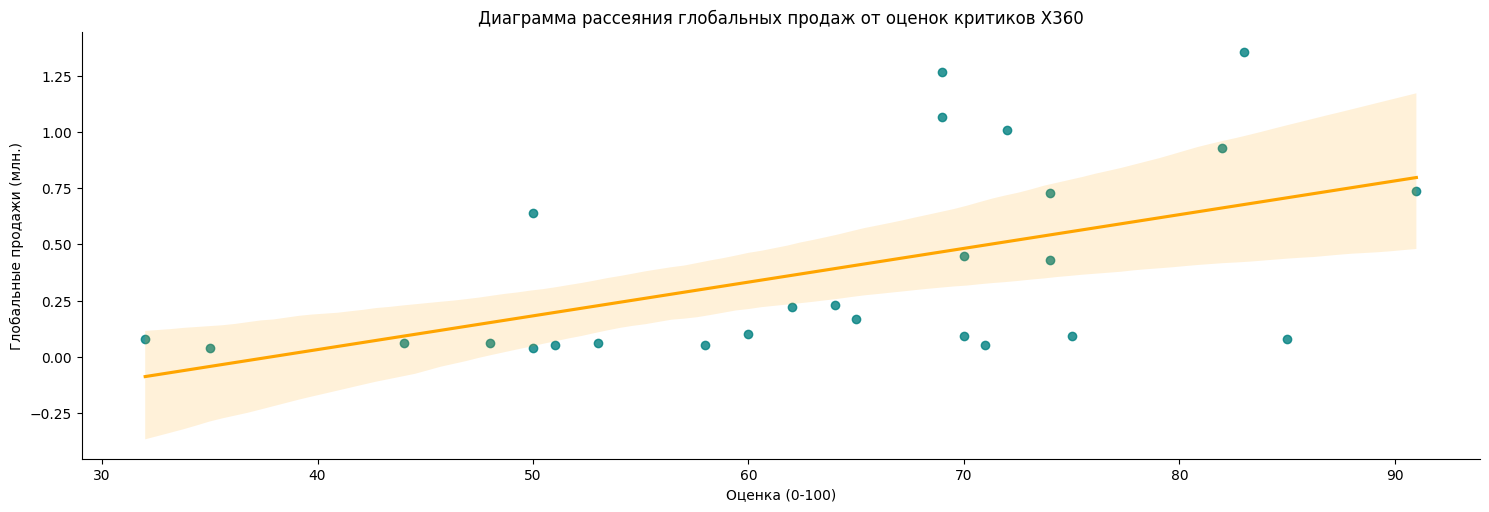

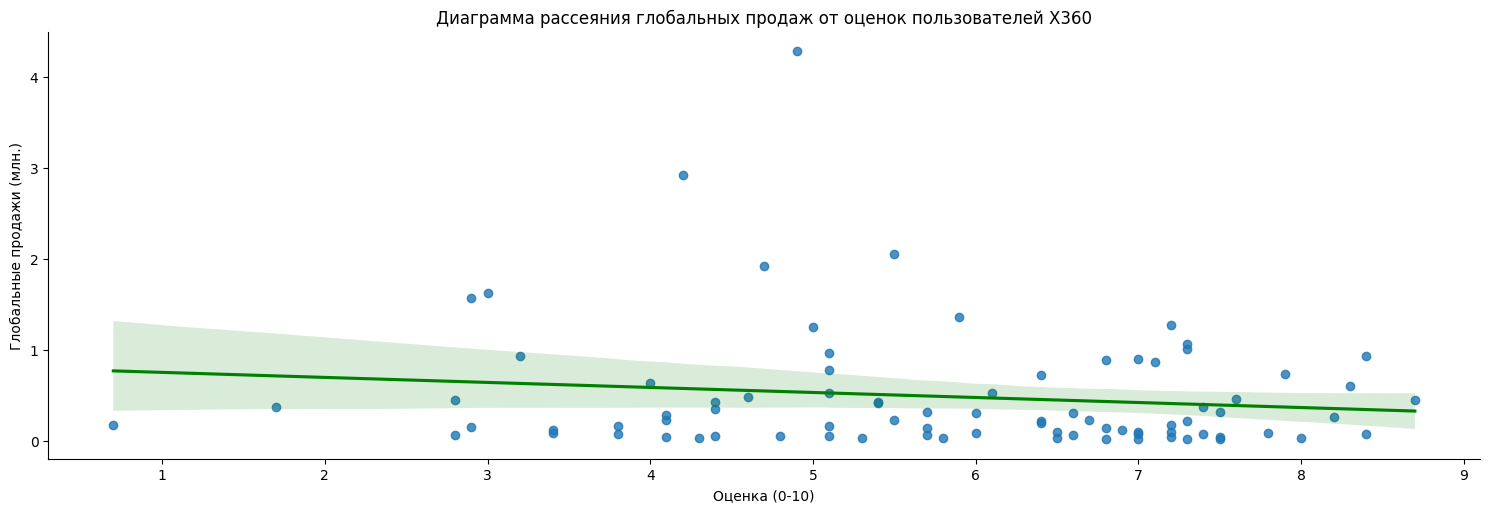

In [66]:
(sns.lmplot(x='critic_score', y='global_sales', data=df_filt[df_filt['platform'] == 'x360'], height=5, aspect=3,
           line_kws={'color': 'orange'}, scatter_kws={'color': 'teal'}).
 set(title='Диаграмма рассеяния глобальных продаж от оценок критиков X360',
     xlabel='Оценка (0-100)', ylabel='Глобальные продажи (млн.)'))

(sns.lmplot(x='user_score', y='global_sales', data=df_filt[df_filt['platform'] == 'x360'], height=5, aspect=3,
           line_kws={'color': 'green'}).
 set(title='Диаграмма рассеяния глобальных продаж от оценок пользователей X360',
     xlabel='Оценка (0-10)', ylabel='Глобальные продажи (млн.)'))

In [67]:
print('Коэффициент линейной корелляции Пирсона для оценок критиков:', df_filt[df_filt['platform'] == 'x360']['critic_score'].
      corr(df_filt[df_filt['platform'] == 'x360']['global_sales']).round(3))
print('Коэффициент линейной корелляции Пирсона для оценок пользователей:', df_filt[df_filt['platform'] == 'x360']['user_score'].
      corr(df_filt[df_filt['platform'] == 'x360']['global_sales']).round(3))

Коэффициент линейной корелляции Пирсона для оценок критиков: 0.526
Коэффициент линейной корелляции Пирсона для оценок пользователей: -0.138


Есть положительная корелляция между оценками критиков и пользователей и глобальными продажами. Для оценок пользоваталей корелляция значительно меньше.

Для удобства восприятия всех коэффициентов корелляции создадим датафрейм.

In [68]:
corr_critics = (df_filt[df_filt['platform'] == 'x360']['critic_score'].
                corr(df_filt[df_filt['platform'] == 'x360']['global_sales']))
corr_users = (df_filt[df_filt['platform'] == 'x360']['user_score'].
              corr(df_filt[df_filt['platform'] == 'x360']['global_sales']))
df_score_sales_corr = pd.DataFrame({'Оценки': ['Критики', 'Пользователи'] , 'x360': [corr_critics, corr_users]})
df_score_sales_corr

,Оценки,x360
0,Критики,0.526
1,Пользователи,-0.138


### Анализ влияния оценок на остальные платформы

Платформа PS4




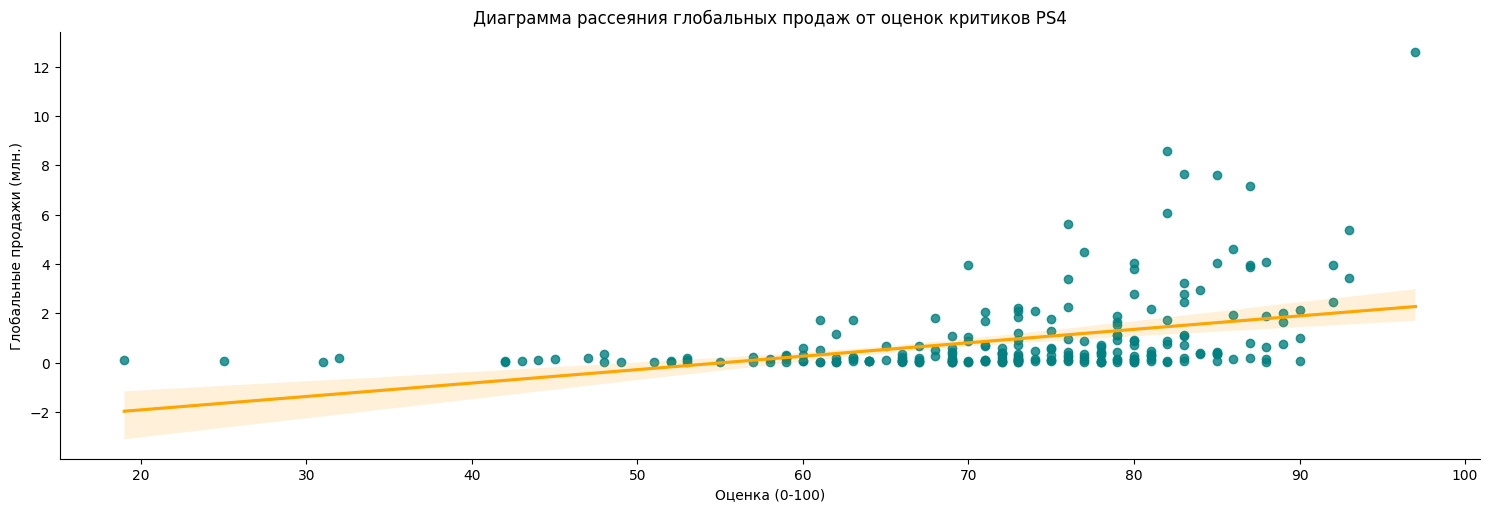

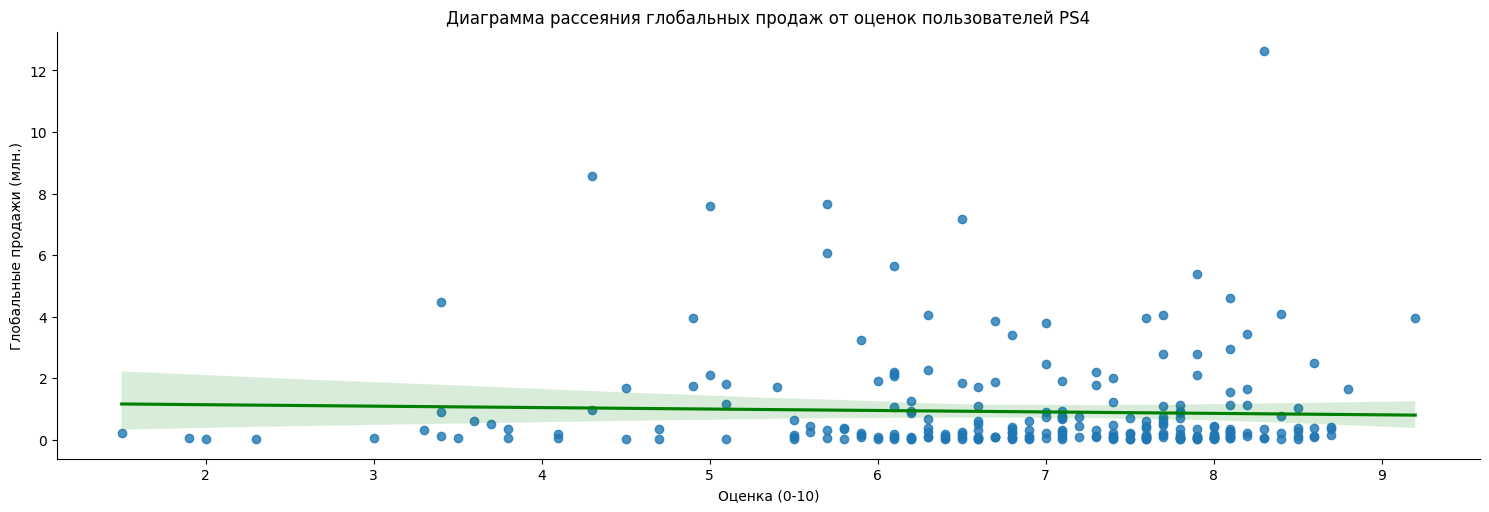



Платформа 3DS




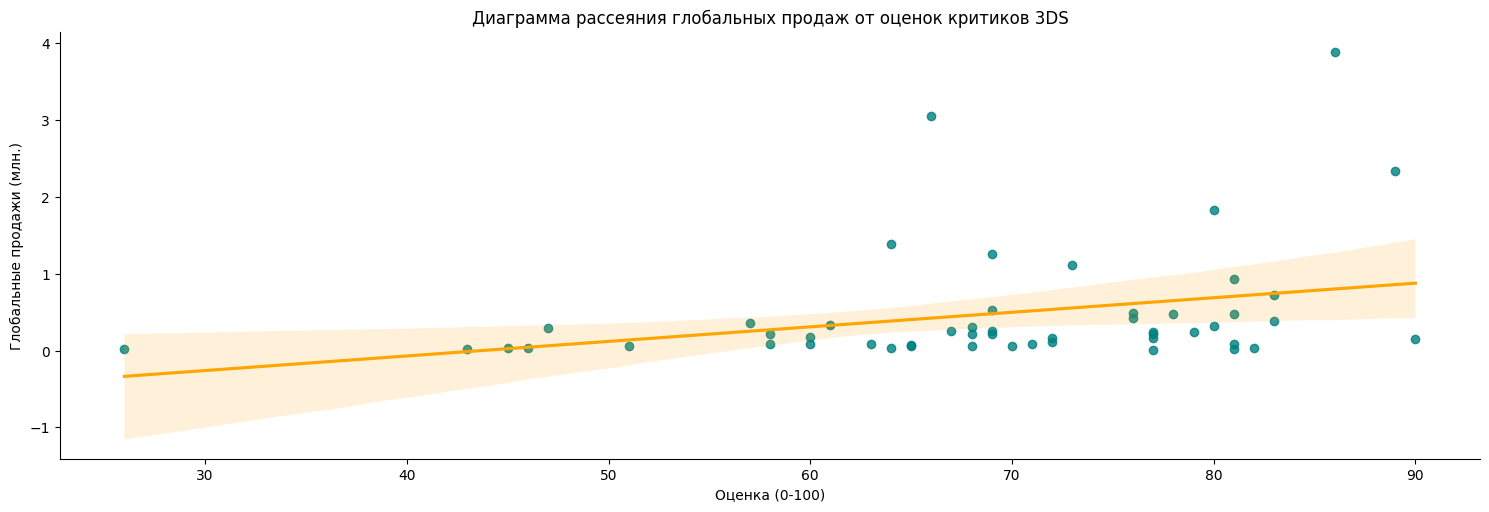

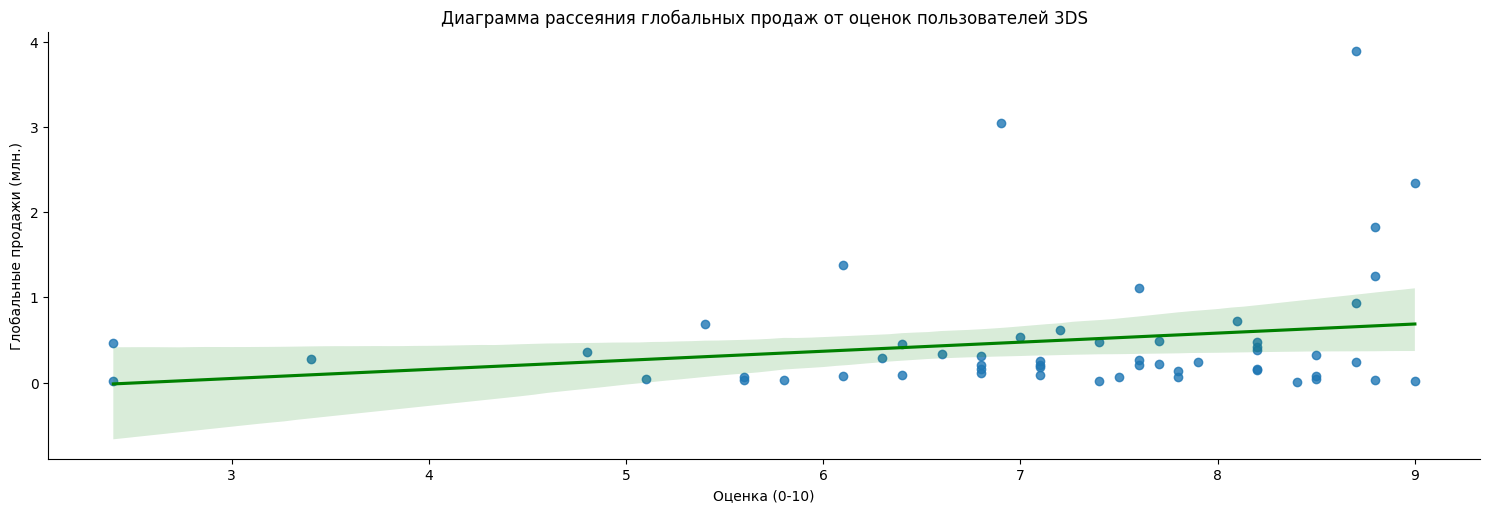



Платформа XONE




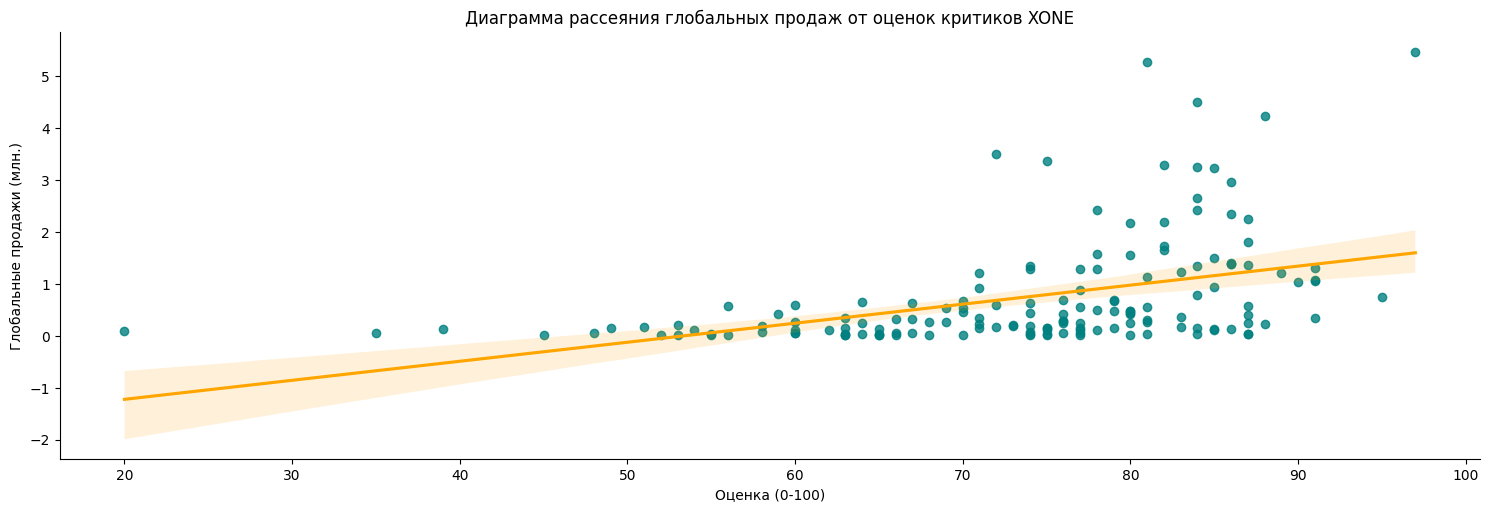

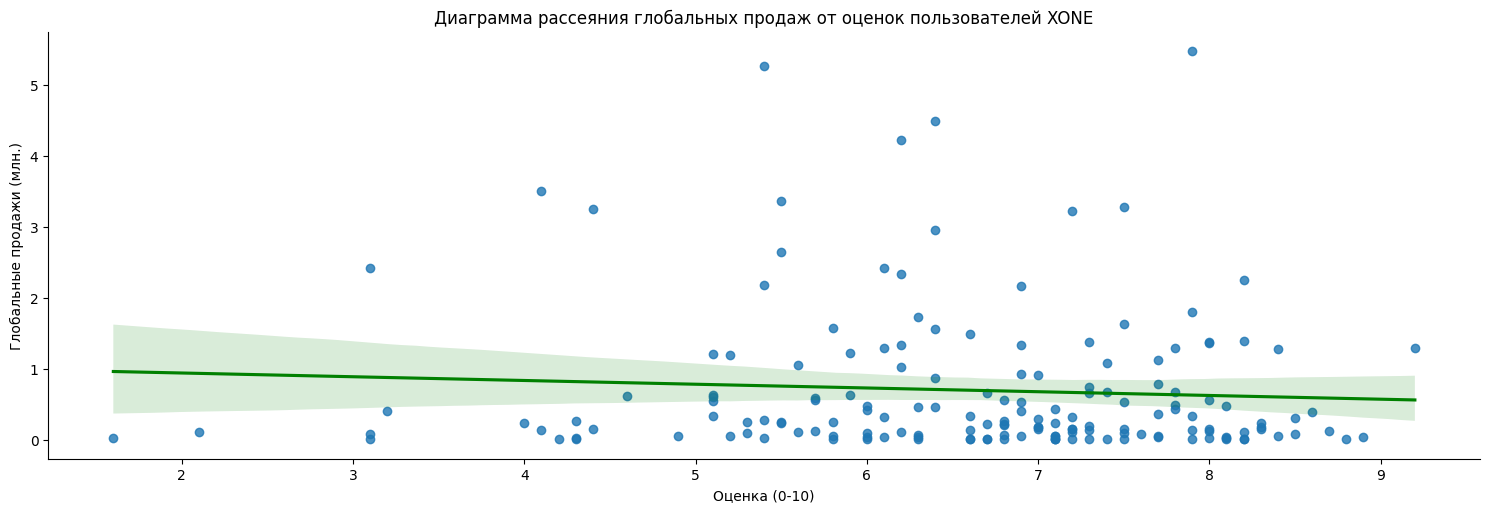



Платформа WIIU




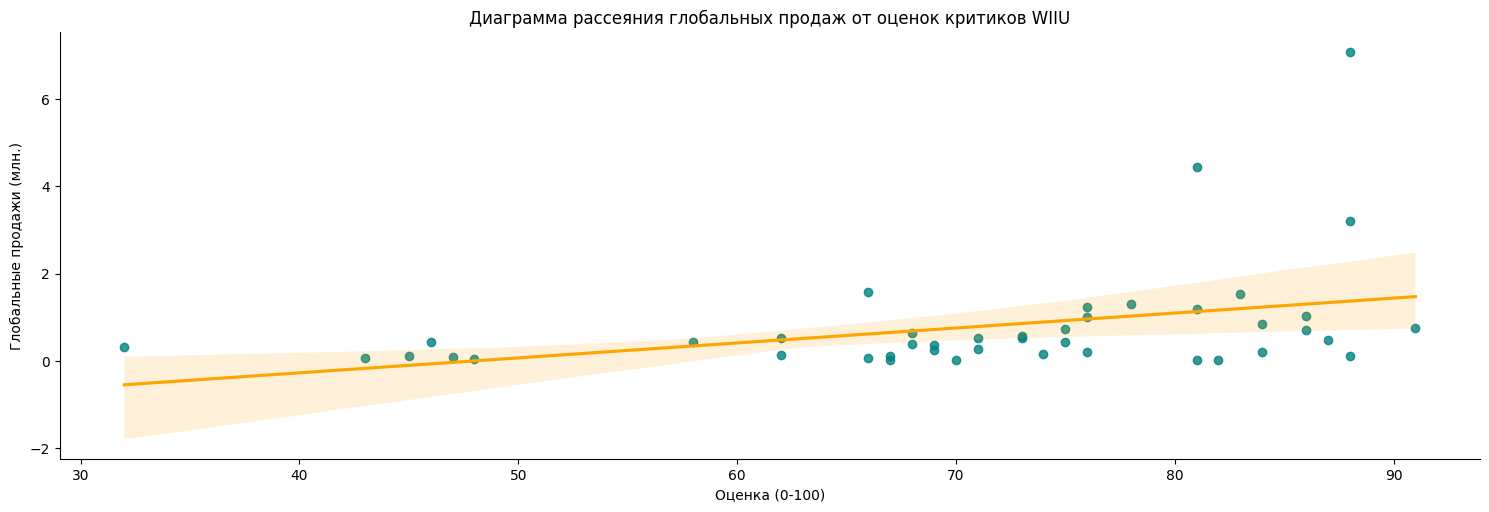

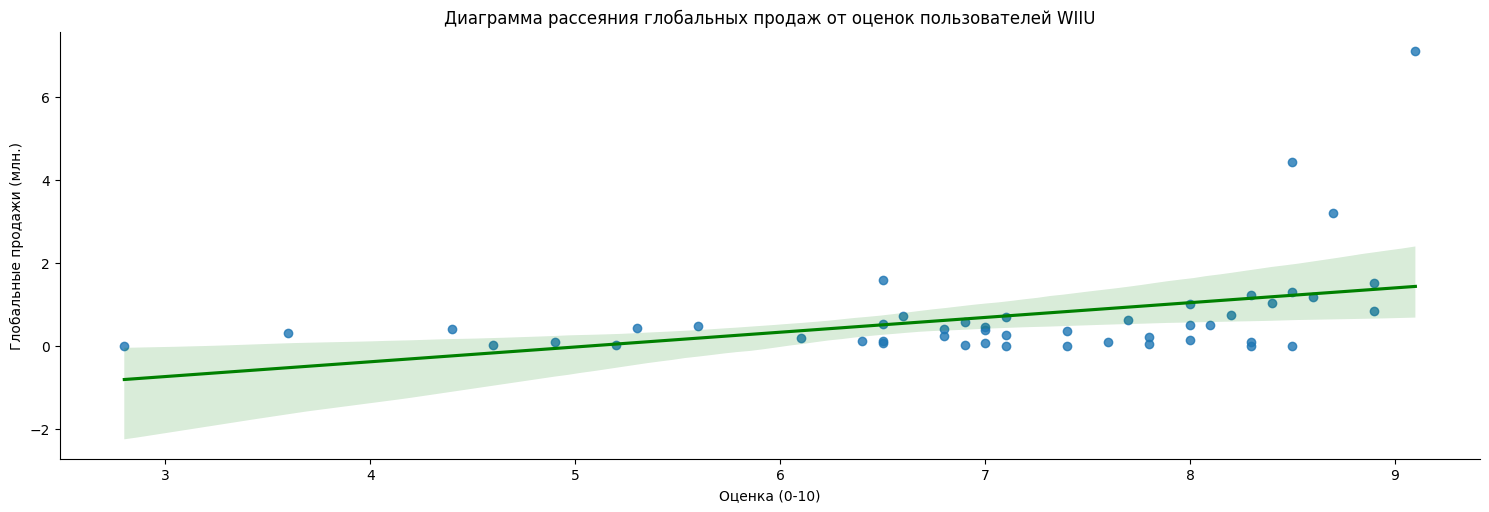



Платформа PS3




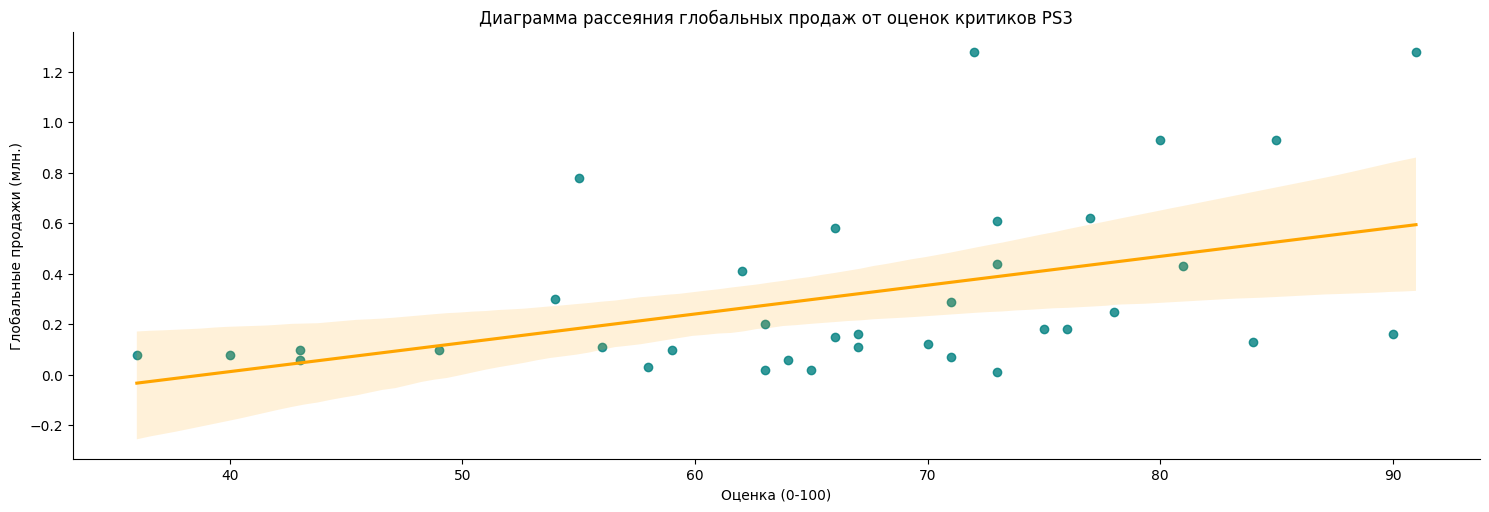

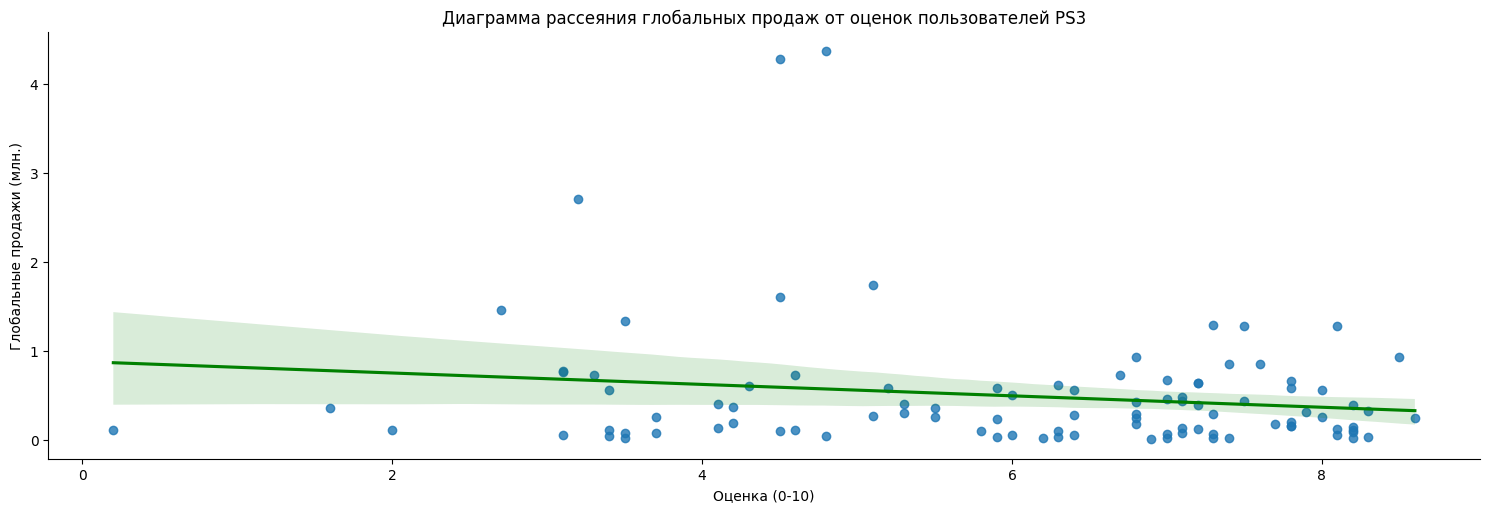



Платформа PC




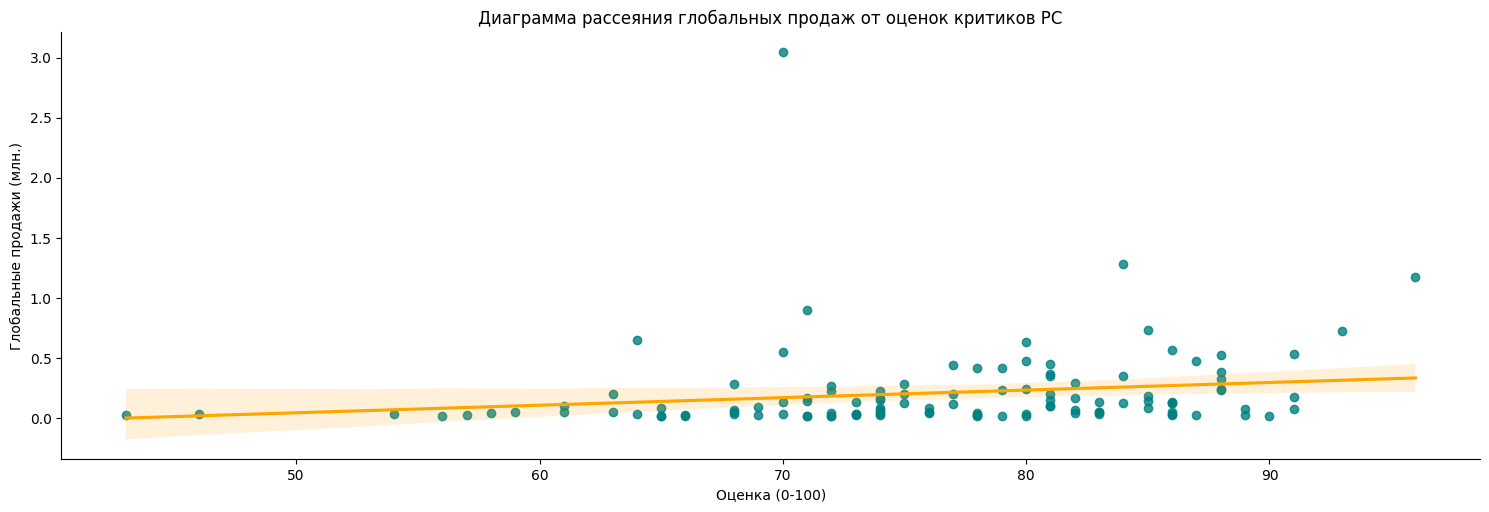

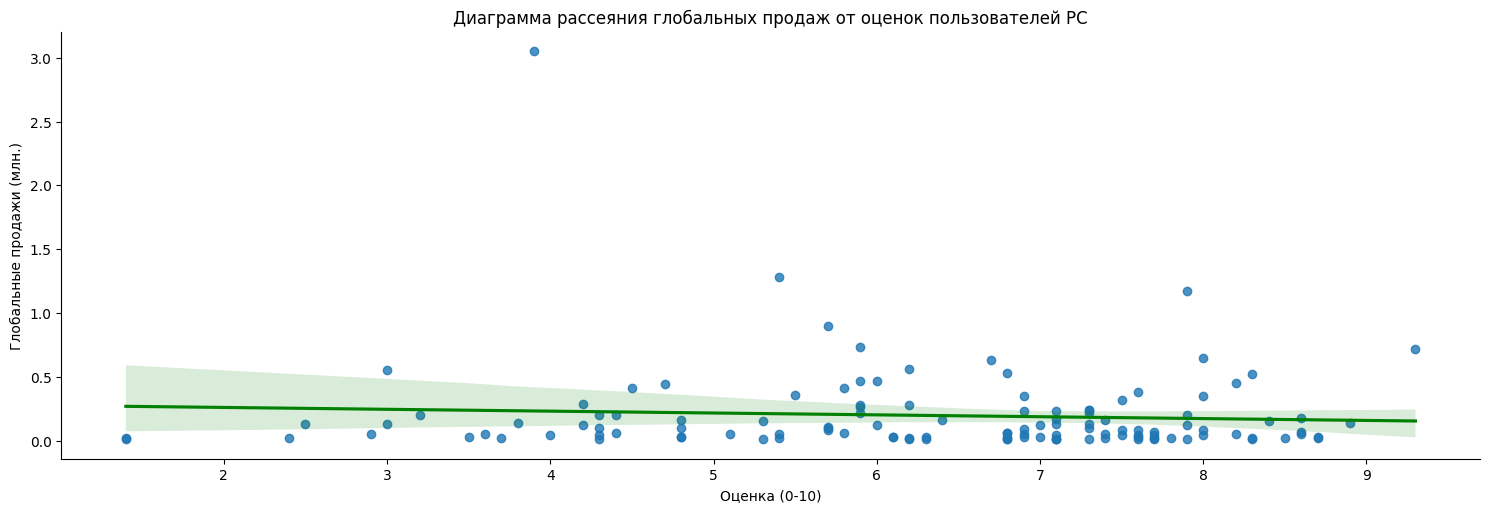



Платформа PSV




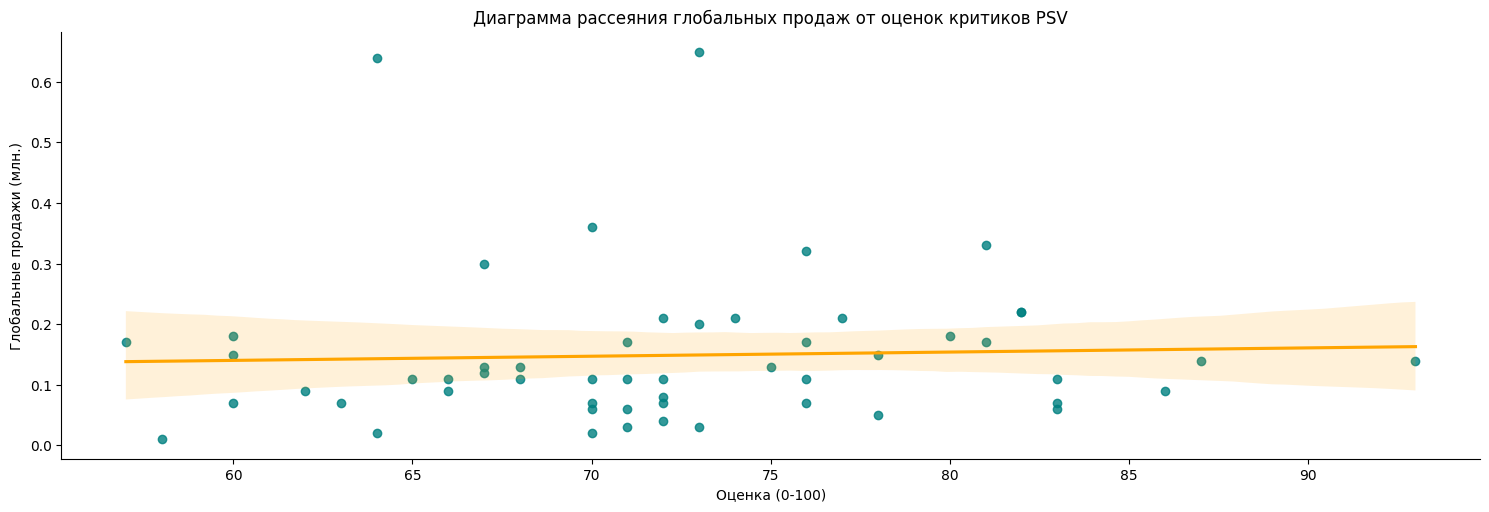

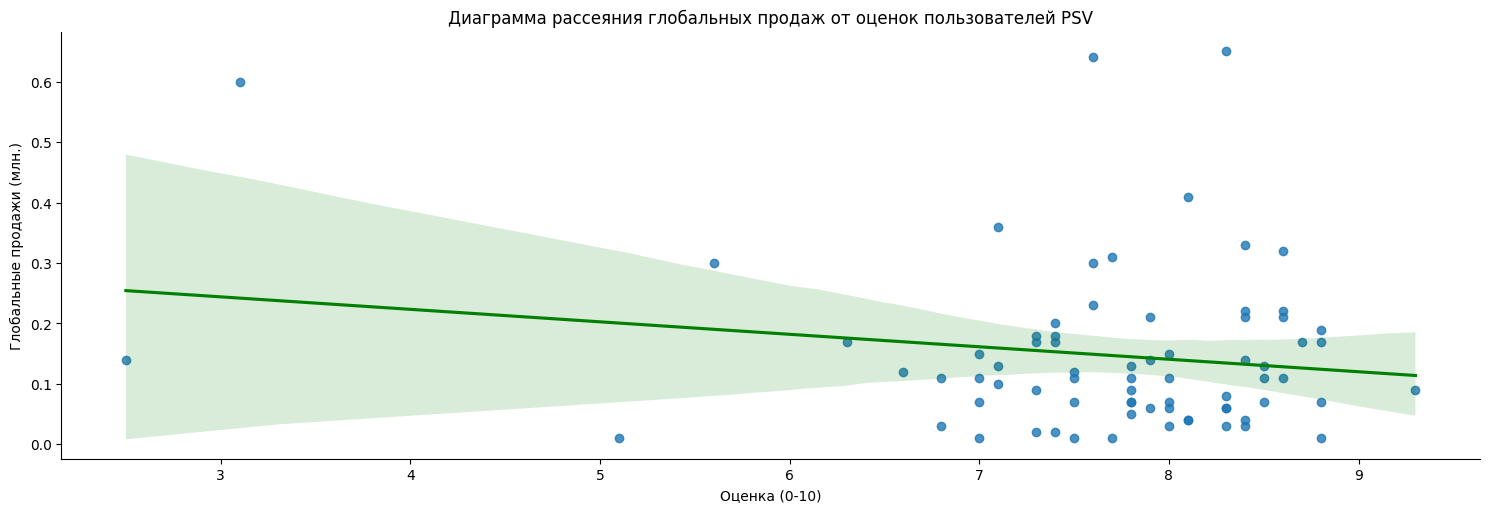



Платформа WII




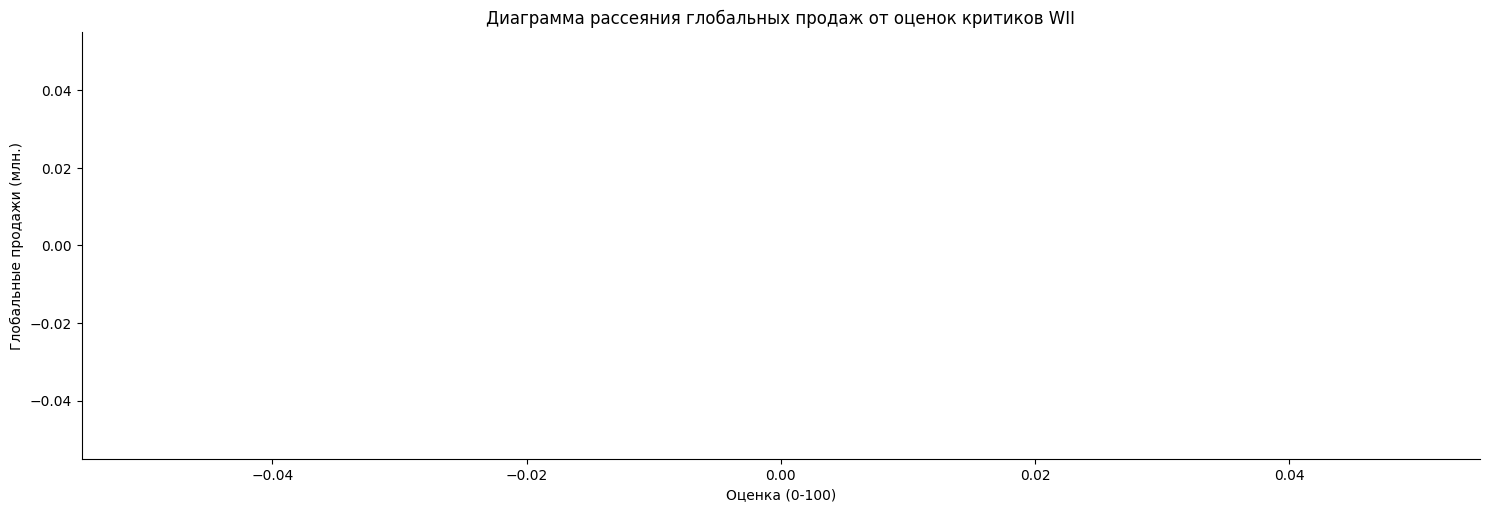

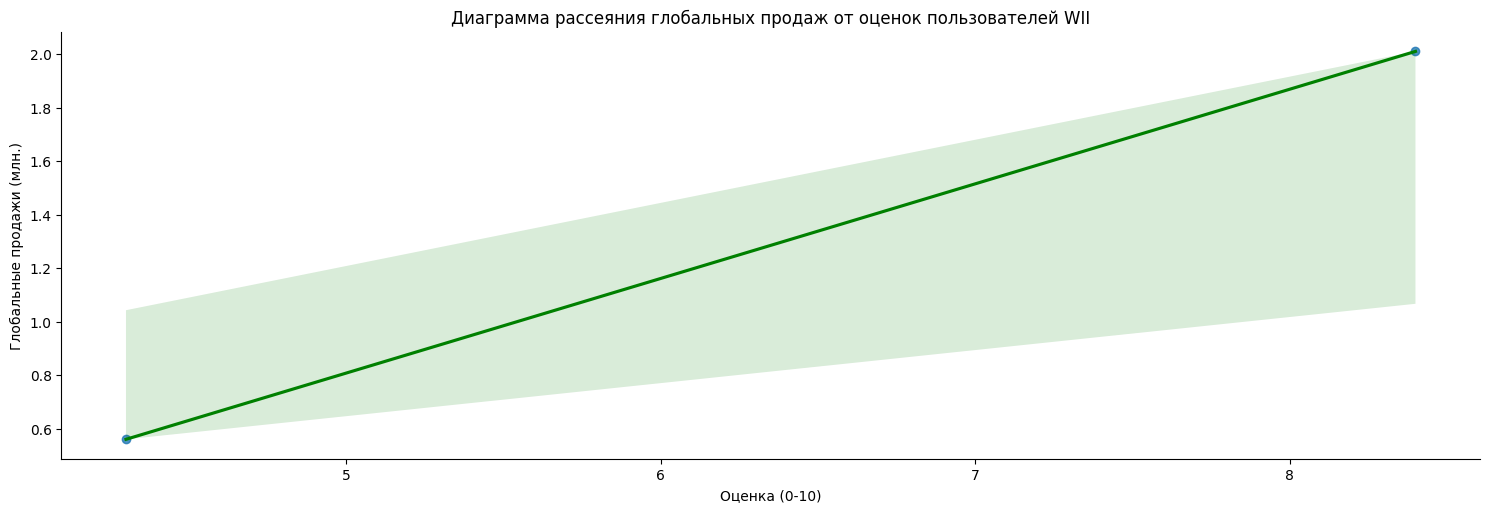

,Оценки,x360,ps4,3ds,xone,wiiu,ps3,pc,psv,wii
0,Критики,0.526,0.403,0.314,0.429,0.370,0.447,0.175,0.043,NaN
1,Пользователи,-0.138,-0.040,0.215,-0.070,0.408,-0.167,-0.072,-0.168,1.000


In [69]:
for platform in platf_current:
    if platform != 'x360':
        print('Платформа', platform.upper())
        print()
        print()
        (sns.lmplot(x='critic_score', y='global_sales', data=df_filt[df_filt['platform'] == platform], height=5, aspect=3,
                   line_kws={'color': 'orange'}, scatter_kws={'color': 'teal'}).
         set(title=f'Диаграмма рассеяния глобальных продаж от оценок критиков {platform.upper()}',
             xlabel='Оценка (0-100)', ylabel='Глобальные продажи (млн.)'))
        plt.show()
        (sns.lmplot(x='user_score', y='global_sales', data=df_filt[df_filt['platform'] == platform], height=5, aspect=3,
                    line_kws={'color': 'green'}).
         set(title=f'Диаграмма рассеяния глобальных продаж от оценок пользователей {platform.upper()}',
             xlabel='Оценка (0-10)', ylabel='Глобальные продажи (млн.)'))
        plt.show()

        corr_critics = (df_filt[df_filt['platform'] == platform]['critic_score'].
                        corr(df_filt[df_filt['platform'] == platform]['global_sales']))
        corr_users = (df_filt[df_filt['platform'] == platform]['user_score'].
                      corr(df_filt[df_filt['platform'] == platform]['global_sales']))
        df_score_sales_corr[platform] = [corr_critics, corr_users]
        print()
        print()

display(df_score_sales_corr)

У оценок критиков положительная корелляция с продажами на всех платформах.
Отдельно можно отметить: XBox 360, PlayStation 3, XBox One, PlayStation 4, Nintendo 3DS, Nintendo WiiU, где корелляция выше.

У оценок пользователей корелляция с продажами на всех платформах есть как положительная так и практически нулевая.
Есть значимая положительная корелляция для платформ Nintendo WiiU, Nintendo 3DS.

### Анализ жанров игр

In [70]:
df_filt

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,call_of_duty:_black_ops_3,ps4,2015,shooter,6.030,5.860,0.360,2.380,NaN,NaN,unknown,14.630
1,grand_theft_auto_v,ps4,2014,action,3.960,6.310,0.380,1.970,97.000,8.300,M,12.620
2,pokemon_omega_ruby/pokemon_alpha_sapphire,3ds,2014,role-playing,4.350,3.490,3.100,0.740,NaN,NaN,unknown,11.680
3,fifa_16,ps4,2015,sports,1.120,6.120,0.060,1.280,82.000,4.300,E,8.580
4,star_wars_battlefront_(2015),ps4,2015,shooter,2.990,3.490,0.220,1.280,NaN,NaN,unknown,7.980
...,...,...,...,...,...,...,...,...,...,...,...,...
1671,strawberry_nauts,psv,2016,adventure,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010
1672,aiyoku_no_eustia,psv,2014,misc,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010
1673,samurai_warriors:_sanada_maru,ps3,2016,action,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010
1674,haitaka_no_psychedelica,psv,2016,adventure,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010


<b>Посмотрим на распределение игр по жанрам</b>

Рассмотрим медианную сумму продаж игр в кждом жанре.

In [71]:
df_filt_gr_genre_sales = (pd.pivot_table(df_filt, values=['global_sales'], index=['genre'], aggfunc=['count', 'median']).
 reset_index().droplevel(level=1, axis=1))
df_filt_gr_genre_sales.columns = ['genre', 'game_count', 'median_sale_sum']
df_filt_gr_genre_sales

,genre,game_count,median_sale_sum
0,action,613,0.090
1,adventure,181,0.030
2,fighting,60,0.125
3,misc,111,0.090
4,platform,38,0.140
5,puzzle,14,0.045
6,racing,69,0.090
7,role-playing,221,0.110
8,shooter,128,0.515
9,simulation,44,0.100


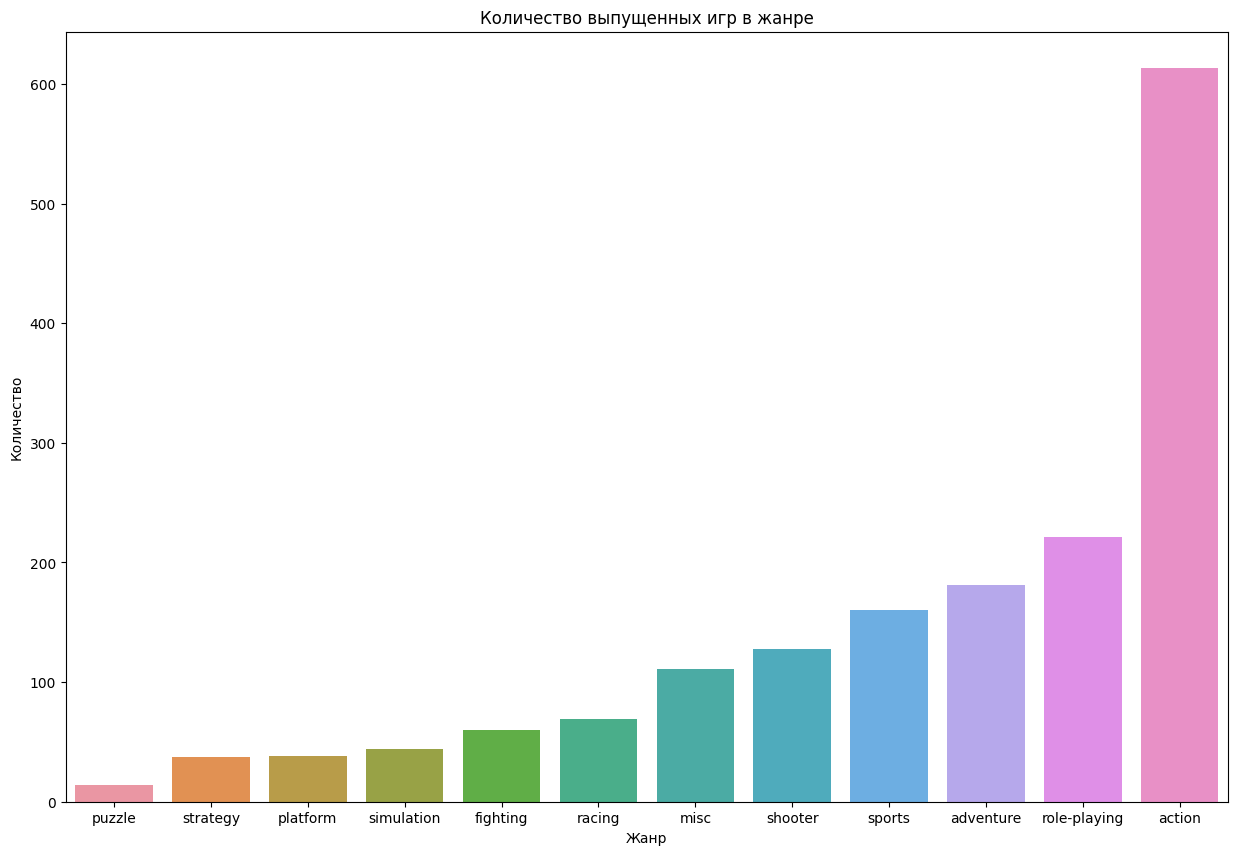

In [72]:
plt.figure(figsize=(15,10))

(sns.barplot(data=df_filt_gr_genre_sales.sort_values(by='game_count'),  x='genre', y='game_count').
 set(title='Количество выпущенных игр в жанре', xlabel='Жанр',  ylabel='Количество'))

plt.show()

Большинство игр выпущены в жанрах:
* Action
* Sports
* Misc

Меньше всего:
* Strategy
* Platform
* Puzzle

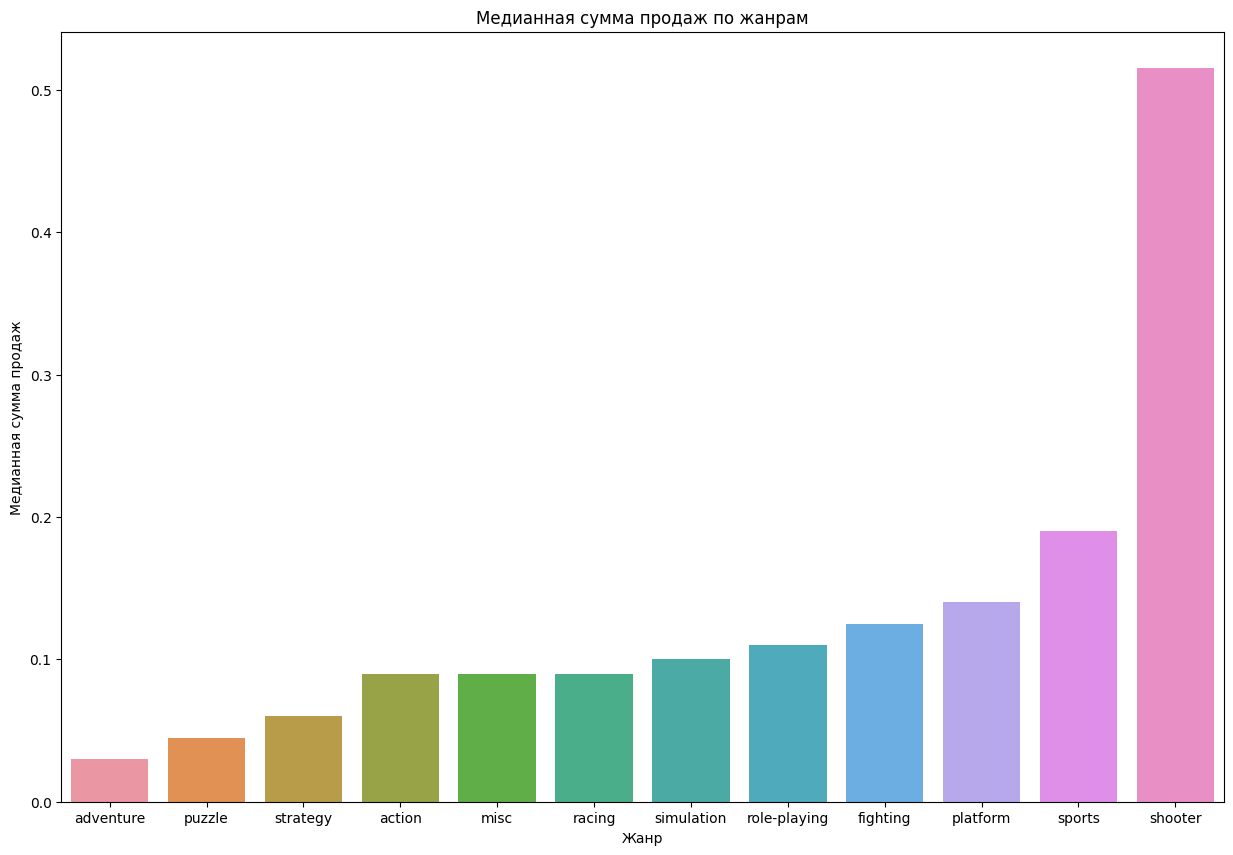

In [73]:
plt.figure(figsize=(15,10))

(sns.barplot(data=df_filt_gr_genre_sales.sort_values(by='median_sale_sum'),  x='genre', y='median_sale_sum').
 set(title='Медианная сумма продаж по жанрам', xlabel='Жанр',  ylabel='Медианная сумма продаж'))

plt.show()

По медианной сумме глобальных продаж лидируют:
* Shooter
* Sports
* Platform

Аутсайдеры:  
* Strategy
* Puzzle
* Adventure

## Вывод

* Определен актуальный период, руководствуясь следующими данными:
    * Большинство игр вышло с 1995 по 2016 год;
    * Средний возраст жизни консолей - 11,0 года, но наибольшие продажи наблюдаются 5-7 лет;
    * Первые игры на актуальные платформы вышли в 2005 году, но в 2006 их вышло почти в 7 раз больше (18 против 120);
    * На 2 из топ 3 платформ первые игры вышли в 2013 году.
    * Выбранный период: 2014-2016 года.    
* Были определены актуальные на 2016 год платформы выпуска игр.
* Проанализировав продажи игры за актуальный были определены наиболее перспективные платформы:
    * PlayStation 4;
    * XBox One;
    * Nintendo 3DS;
    * Nintendo WiiU.
* Проанализировав глобальные продажи по платформам было определено, что платформы c лучшими глобальными продажами это:
    * XBox 360;
    * PS 3;
    * PS 4;
    * XBox One.
* Проанализировав влияние оценок критиков и пользователей на продажи было определено, что:
    * У оценок критиков положительная корелляция с продажами на всех платформах. Наибольшая у: XBox 360, PlayStation 3, XBox One, PlayStation 4.
    * У оценок пользователей корелляция с продажами на всех платформах есть как положительная так и практически нулевая. Есть значимая положительная корелляция для платформ Nintendo WiiU, Nintendo 3DS.
* Проанализировав количество выходящих игр в разных жанрах и зависимость продаж от игр от жанра:
   * По количеству выпускаемых игры лидируют
        * Action;
        * Sports;
        * Misc.
   * Аутсайдеры:
        * Strategy;
        * Platform;
        * Puzzle.
   * По продажам лидируют
        * Shooter;
        * Sports;
        * Platform.

Таким образом наиболее перспективные платформы для выпуска игр:
* PlayStation 4;
* XBox One.

А наиболее перспективные жанры:
* Shooter;
* Sports;
* Platform.
При этом, игр жанра platform выходит мало и там меньше конкуренция, а в жанре sports она больше. И то, что по медианным продажам shooter более чем в два раза обгоняет конкурентов.

Стоит также отметить, что для разных платформ наиболее перспективные жанры могут меняться и при выборе платформы и жанра следует уточнять данные.

# Портрет пользователя

In [74]:
df_filt

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,call_of_duty:_black_ops_3,ps4,2015,shooter,6.030,5.860,0.360,2.380,NaN,NaN,unknown,14.630
1,grand_theft_auto_v,ps4,2014,action,3.960,6.310,0.380,1.970,97.000,8.300,M,12.620
2,pokemon_omega_ruby/pokemon_alpha_sapphire,3ds,2014,role-playing,4.350,3.490,3.100,0.740,NaN,NaN,unknown,11.680
3,fifa_16,ps4,2015,sports,1.120,6.120,0.060,1.280,82.000,4.300,E,8.580
4,star_wars_battlefront_(2015),ps4,2015,shooter,2.990,3.490,0.220,1.280,NaN,NaN,unknown,7.980
...,...,...,...,...,...,...,...,...,...,...,...,...
1671,strawberry_nauts,psv,2016,adventure,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010
1672,aiyoku_no_eustia,psv,2014,misc,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010
1673,samurai_warriors:_sanada_maru,ps3,2016,action,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010
1674,haitaka_no_psychedelica,psv,2016,adventure,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010


## Определение топ 5 самых популярных платформ

In [75]:
df_filt_gr_region_platf_sales = pd.pivot_table(df_filt, values=['na_sales', 'eu_sales', 'jp_sales'],
                                                         index=['platform'], aggfunc='sum').reset_index()
df_filt_gr_region_platf_sales

,platform,eu_sales,jp_sales,na_sales
0,3ds,16.120,44.240,22.640
1,pc,17.970,0.000,7.230
2,ps3,25.540,11.220,22.050
3,ps4,130.040,15.020,98.610
4,psv,3.530,14.540,2.520
5,wii,2.590,0.000,2.080
6,wiiu,13.150,7.310,19.360
7,x360,15.490,0.080,28.300
8,xone,46.250,0.320,81.270


In [76]:
df_filt_gr_region_platf_sales['na_sales_perc'] = (df_filt_gr_region_platf_sales['na_sales'] /
                                                   df_filt_gr_region_platf_sales['na_sales'].sum())
df_filt_gr_region_platf_sales['eu_sales_perc'] = (df_filt_gr_region_platf_sales['eu_sales'] /
                                                   df_filt_gr_region_platf_sales['eu_sales'].sum())
df_filt_gr_region_platf_sales['jp_sales_perc'] = (df_filt_gr_region_platf_sales['jp_sales'] /
                                                   df_filt_gr_region_platf_sales['jp_sales'].sum())

df_filt_gr_region_platf_sales

,platform,eu_sales,jp_sales,na_sales,na_sales_perc,eu_sales_perc,jp_sales_perc
0,3ds,16.120,44.240,22.640,0.080,0.060,0.477
1,pc,17.970,0.000,7.230,0.025,0.066,0.000
2,ps3,25.540,11.220,22.050,0.078,0.094,0.121
3,ps4,130.040,15.020,98.610,0.347,0.480,0.162
4,psv,3.530,14.540,2.520,0.009,0.013,0.157
5,wii,2.590,0.000,2.080,0.007,0.010,0.000
6,wiiu,13.150,7.310,19.360,0.068,0.049,0.079
7,x360,15.490,0.080,28.300,0.100,0.057,0.001
8,xone,46.250,0.320,81.270,0.286,0.171,0.003


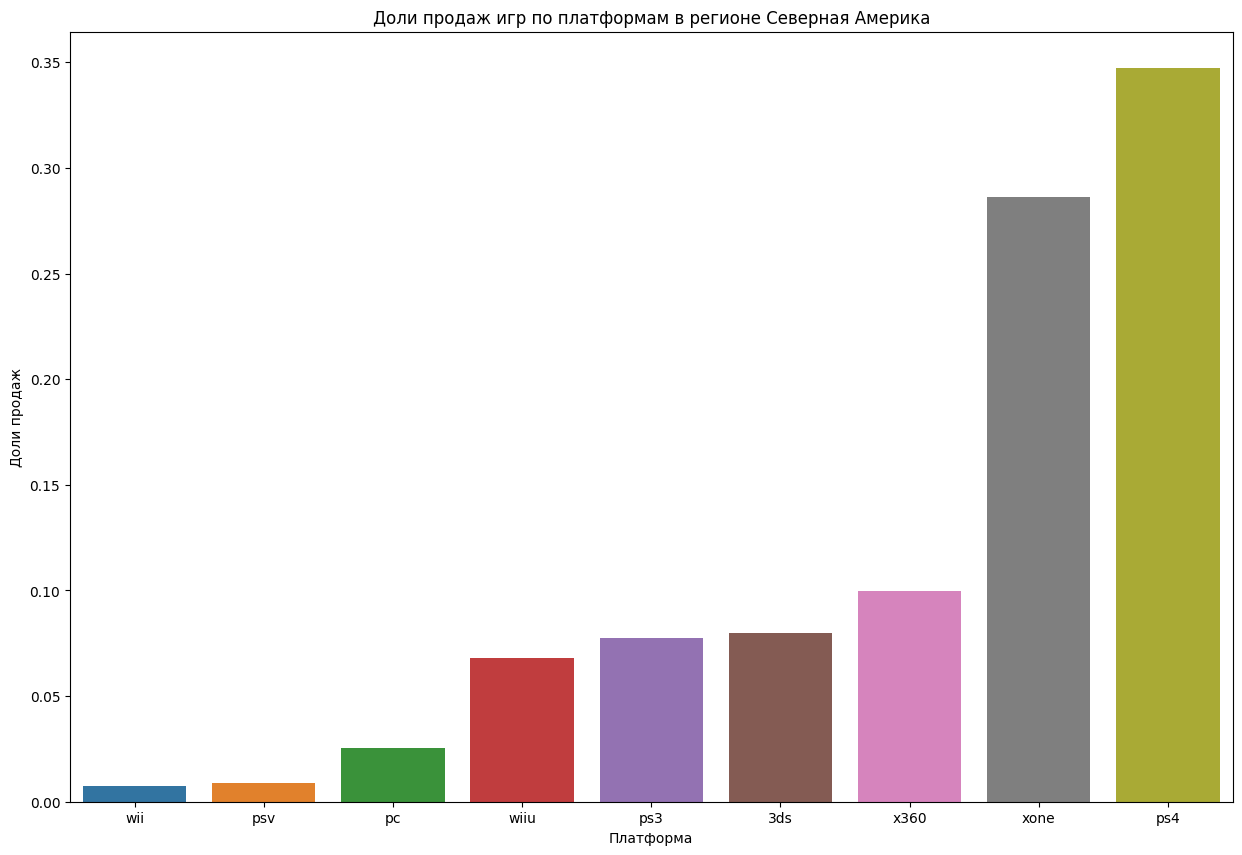

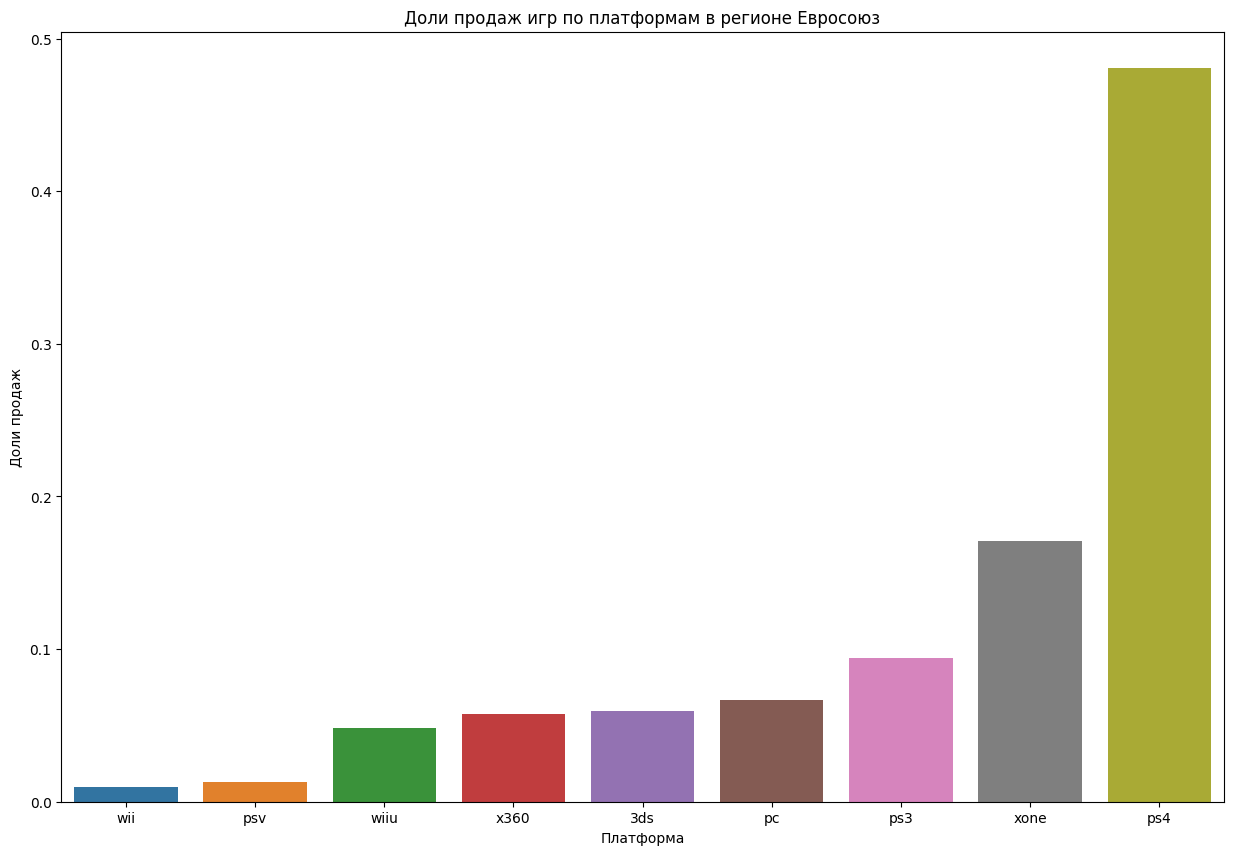

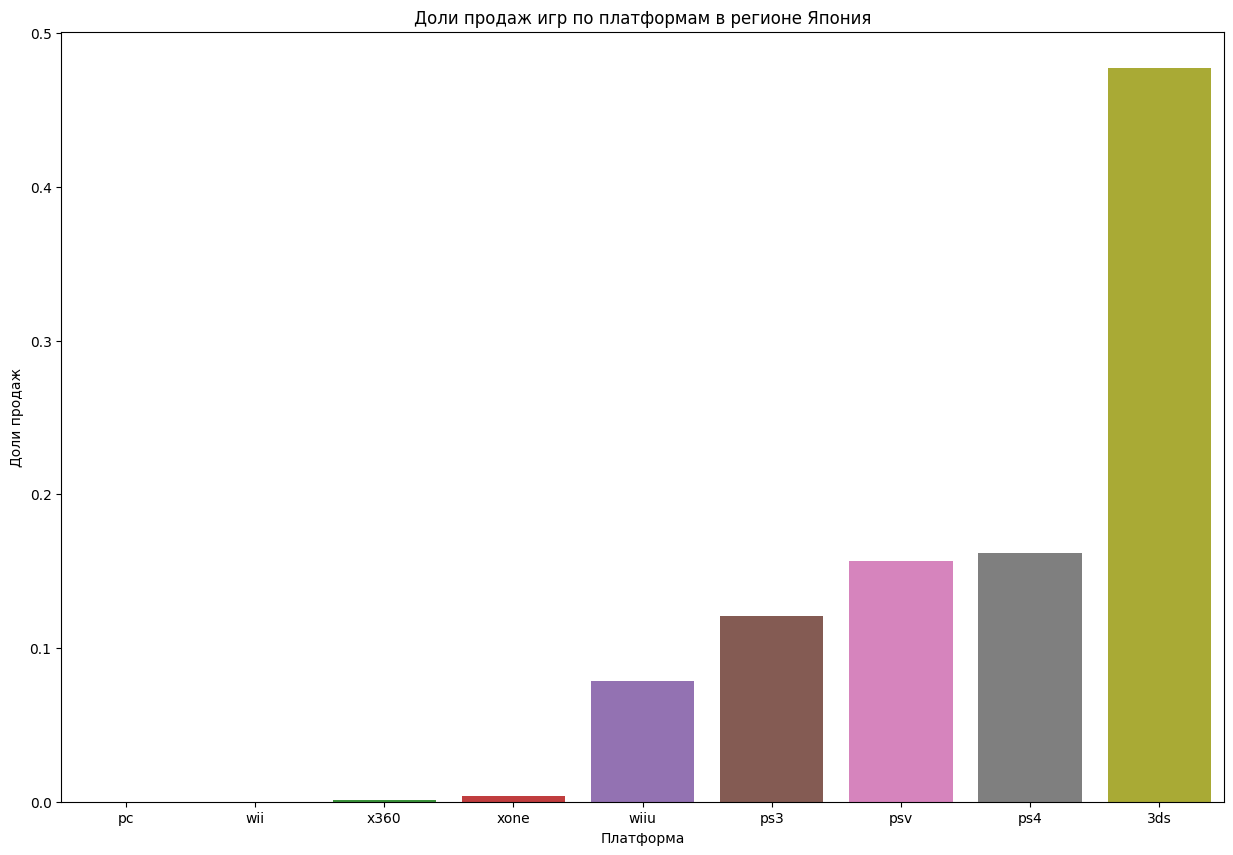

In [77]:
plt.figure(figsize=(15,10))
(sns.barplot(data=df_filt_gr_region_platf_sales.sort_values(by='na_sales'), x='platform', y='na_sales_perc').
 set(title='Доли продаж игр по платформам в регионе Северная Америка', xlabel='Платформа',
     ylabel='Доли продаж'))
plt.show()

plt.figure(figsize=(15,10))
(sns.barplot(data=df_filt_gr_region_platf_sales.sort_values(by='eu_sales'), x='platform', y='eu_sales_perc').
 set(title='Доли продаж игр по платформам в регионе Евросоюз', xlabel='Платформа',
     ylabel='Доли продаж'))
plt.show()

plt.figure(figsize=(15,10))
(sns.barplot(data=df_filt_gr_region_platf_sales.sort_values(by='jp_sales'), x='platform', y='jp_sales_perc').
 set(title='Доли продаж игр по платформам в регионе Япония', xlabel='Платформа',
     ylabel='Доли продаж'))
plt.show()

Топ 5 платформ для региона Северная Америка по долям продаж:
* PS4 - 0.35
* XBox One - 0.29
* XBox 360 - 0.1
* 3DS - 0.08
* PS3 - 0.08

Топ 5 платформ для региона Евросоюз по долям продаж:
* PS4 - 0.48
* XBox One - 0.17
* PS3 - 0.09
* PC - 0.07
* 3DS - 0.06

Топ 5 платформ для региона Япония по долям продаж:
* 3DS - 0.48
* PS4 - 0.16
* PSV - 0.16
* PS3 - 0.12
* WiiU - 0.08

Топ 5 платформ для региона Северная Америка представлен 5 домашними консолями. Выражено лидирует PS4 от японской компании Sony, следом идёт XBox One от американской компании Microsoft.

Топ 5 платформ для региона Евросоюз представлен 4 домашними консолями и персональным компьютером. Лидирует с большим отрывом от главного конкурента PS4 от японской компании Sony.

Топ 5 платформ для региона Япония представлен 2 портативными и 3 домашними консолями. Лидирует портативная консоль 3DS от японской комании Nintendo. Все 5 консолей производятся явпонскими компаниями Nintendo и Sony.

## Определение топ 5 самых популярных жанров

In [78]:
df_filt_gr_genre_platf_sales = pd.pivot_table(df_filt, values=['na_sales', 'eu_sales', 'jp_sales'], index=['genre'],
                                   aggfunc='sum').reset_index()
df_filt_gr_genre_platf_sales

,genre,eu_sales,jp_sales,na_sales
0,action,74.680,29.380,72.530
1,adventure,6.490,3.550,5.640
2,fighting,6.690,6.370,12.430
3,misc,12.860,5.590,15.050
4,platform,6.800,2.690,6.790
5,puzzle,0.520,0.930,0.650
6,racing,14.130,1.760,8.740
7,role-playing,28.170,31.160,33.470
8,shooter,65.520,4.870,79.020
9,simulation,7.300,2.310,2.630


In [79]:
df_filt_gr_genre_platf_sales['na_sales_perc'] = (df_filt_gr_genre_platf_sales['na_sales'] /
                                                   df_filt_gr_genre_platf_sales['na_sales'].sum())
df_filt_gr_genre_platf_sales['eu_sales_perc'] = (df_filt_gr_genre_platf_sales['eu_sales'] /
                                                   df_filt_gr_genre_platf_sales['eu_sales'].sum())
df_filt_gr_genre_platf_sales['jp_sales_perc'] = (df_filt_gr_genre_platf_sales['jp_sales'] /
                                                   df_filt_gr_genre_platf_sales['jp_sales'].sum())

df_filt_gr_genre_platf_sales

,genre,eu_sales,jp_sales,na_sales,na_sales_perc,eu_sales_perc,jp_sales_perc
0,action,74.680,29.380,72.530,0.255,0.276,0.317
1,adventure,6.490,3.550,5.640,0.020,0.024,0.038
2,fighting,6.690,6.370,12.430,0.044,0.025,0.069
3,misc,12.860,5.590,15.050,0.053,0.048,0.060
4,platform,6.800,2.690,6.790,0.024,0.025,0.029
5,puzzle,0.520,0.930,0.650,0.002,0.002,0.010
6,racing,14.130,1.760,8.740,0.031,0.052,0.019
7,role-playing,28.170,31.160,33.470,0.118,0.104,0.336
8,shooter,65.520,4.870,79.020,0.278,0.242,0.053
9,simulation,7.300,2.310,2.630,0.009,0.027,0.025


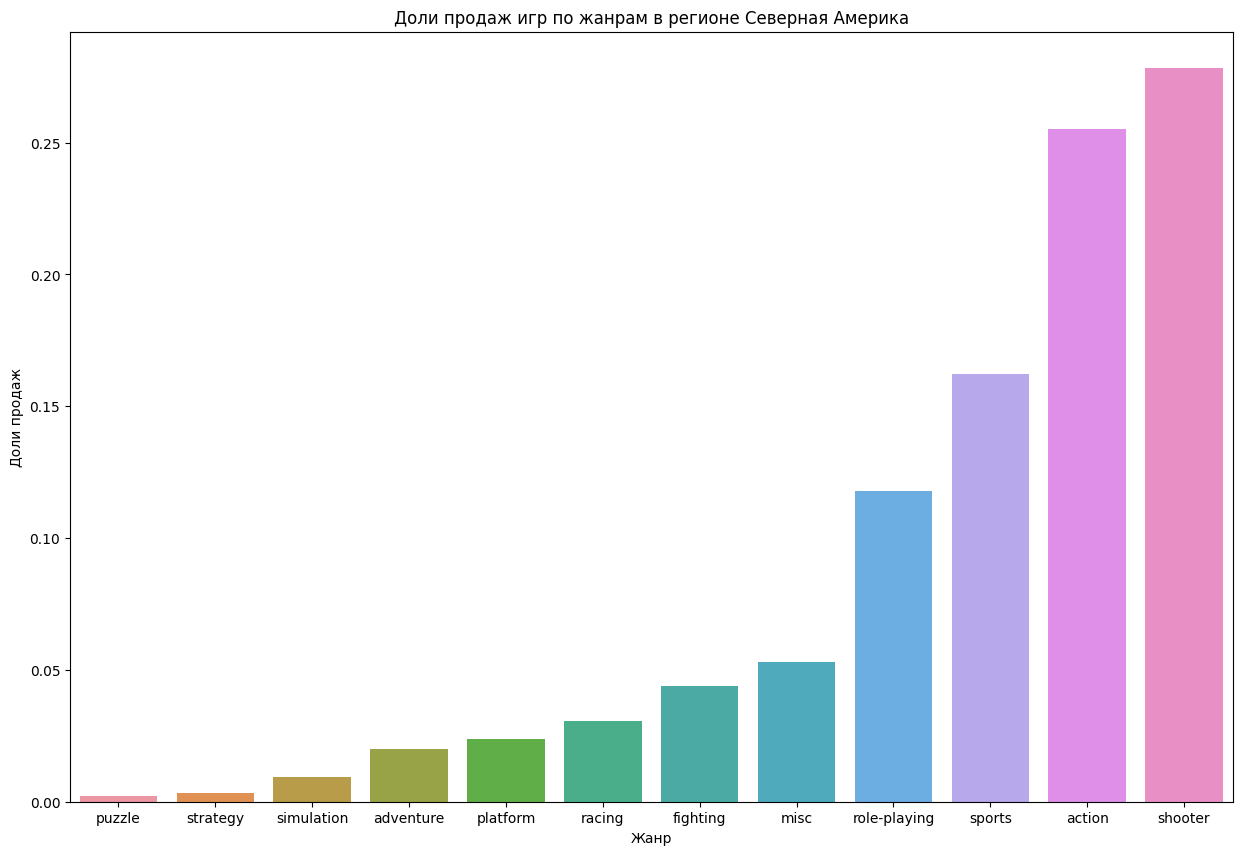

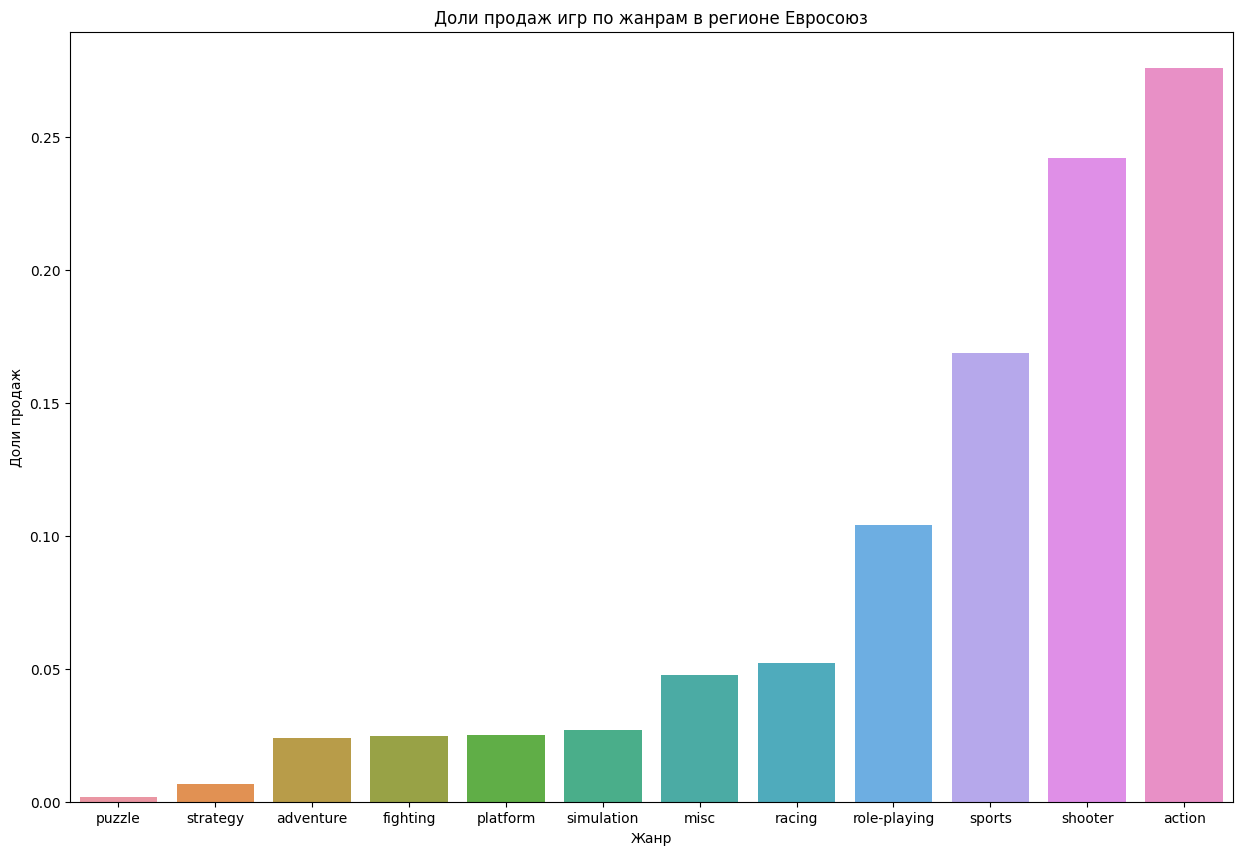

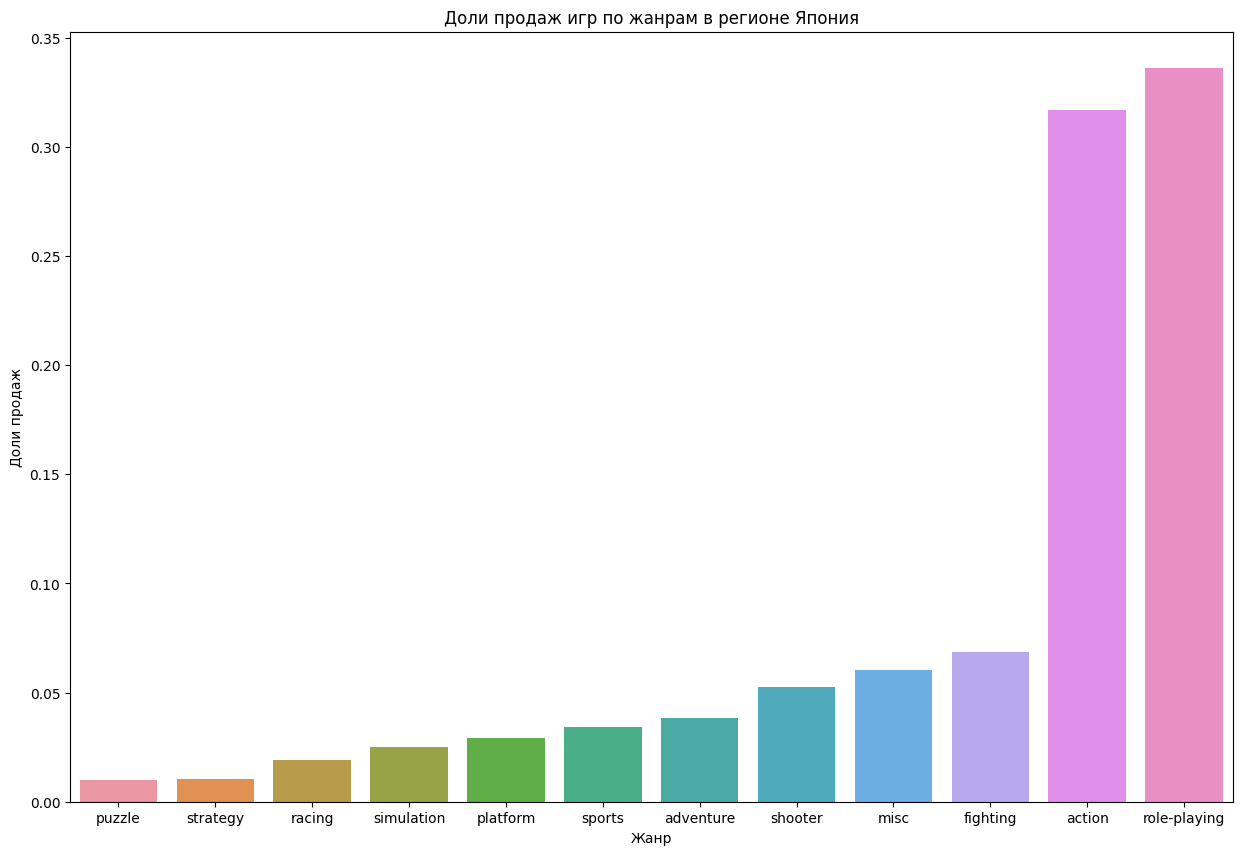

In [80]:
plt.figure(figsize=(15,10))
(sns.barplot(data=df_filt_gr_genre_platf_sales.sort_values(by='na_sales'), x='genre', y='na_sales_perc').
 set(title='Доли продаж игр по жанрам в регионе Северная Америка', xlabel='Жанр',
     ylabel='Доли продаж'))
plt.show()

plt.figure(figsize=(15,10))
(sns.barplot(data=df_filt_gr_genre_platf_sales.sort_values(by='eu_sales'), x='genre', y='eu_sales_perc').
 set(title='Доли продаж игр по жанрам в регионе Евросоюз', xlabel='Жанр',
     ylabel='Доли продаж'))
plt.show()

plt.figure(figsize=(15,10))
(sns.barplot(data=df_filt_gr_genre_platf_sales.sort_values(by='jp_sales'), x='genre', y='jp_sales_perc').
 set(title='Доли продаж игр по жанрам в регионе Япония', xlabel='Жанр',
     ylabel='Доли продаж'))
plt.show()

Топ 5 жанров для региона Северная Америка по долям продаж:
* Shooter - 0.28
* Action - 0.26
* Sports - 0.16
* Role-Playing - 0.12
* Misc - 0.05

Топ 5 жанров для региона Евросоюз по долям продаж:
* Action - 0.28
* Shooter - 0.24
* Sports - 0.17
* Role-Playing - 0.1
* Racing - 0.05

Топ 5 жанров для региона Япония по долям продаж:
* Role-Playing - 0.34
* Action - 0.32
* Fighting - 0.07
* Misc - 0.06
* Platform - 0.05

Топ 5 жанров для региона Северная Америка схож с топ 5 для региона Евросоюз. Отличия в 5 месте, в Северной Америке - это Misc, в Евросоюзе - Racing.

В топ 5 жанров для региона Япония лидирует Role-Playing и присутствует жанры Fighting и Platform, которых нет в двух других регионах.

## Влияние рейтинга ESRB на разные регионы

In [81]:
df_filt_gr_rating_reg_sales = pd.pivot_table(df_filt, values=['na_sales', 'eu_sales', 'jp_sales'], index=['rating'],
                                   aggfunc='sum').reset_index()
df_filt_gr_rating_reg_sales

,rating,eu_sales,jp_sales,na_sales
0,E,58.060,8.940,50.740
1,E10+,26.160,4.460,33.230
2,M,93.440,8.010,96.420
3,T,34.070,14.780,38.950
4,unknown,58.950,56.540,64.720


In [82]:
df_filt_gr_rating_reg_sales['na_sales_perc'] = (df_filt_gr_rating_reg_sales['na_sales'] /
                                                   df_filt_gr_rating_reg_sales['na_sales'].sum())
df_filt_gr_rating_reg_sales['eu_sales_perc'] = (df_filt_gr_rating_reg_sales['eu_sales'] /
                                                   df_filt_gr_rating_reg_sales['eu_sales'].sum())
df_filt_gr_rating_reg_sales['jp_sales_perc'] = (df_filt_gr_rating_reg_sales['jp_sales'] /
                                                   df_filt_gr_rating_reg_sales['jp_sales'].sum())

df_filt_gr_rating_reg_sales

,rating,eu_sales,jp_sales,na_sales,na_sales_perc,eu_sales_perc,jp_sales_perc
0,E,58.060,8.940,50.740,0.179,0.214,0.096
1,E10+,26.160,4.460,33.230,0.117,0.097,0.048
2,M,93.440,8.010,96.420,0.339,0.345,0.086
3,T,34.070,14.780,38.950,0.137,0.126,0.159
4,unknown,58.950,56.540,64.720,0.228,0.218,0.610


<b>Описание рейтингов ESRB.</b>
* EC - Early Childhood (Для детей младшего возраста)
* E - Everyone (Для всех)
* E10+ - Everyone 10+ (Для всех от 10 лет и старше)
* T - Teen (Подросткам, обычно 13+)
* M - Mature (Взрослым, обычно 17+)
* RP - Rating Pending (Рейтинг ожидается)


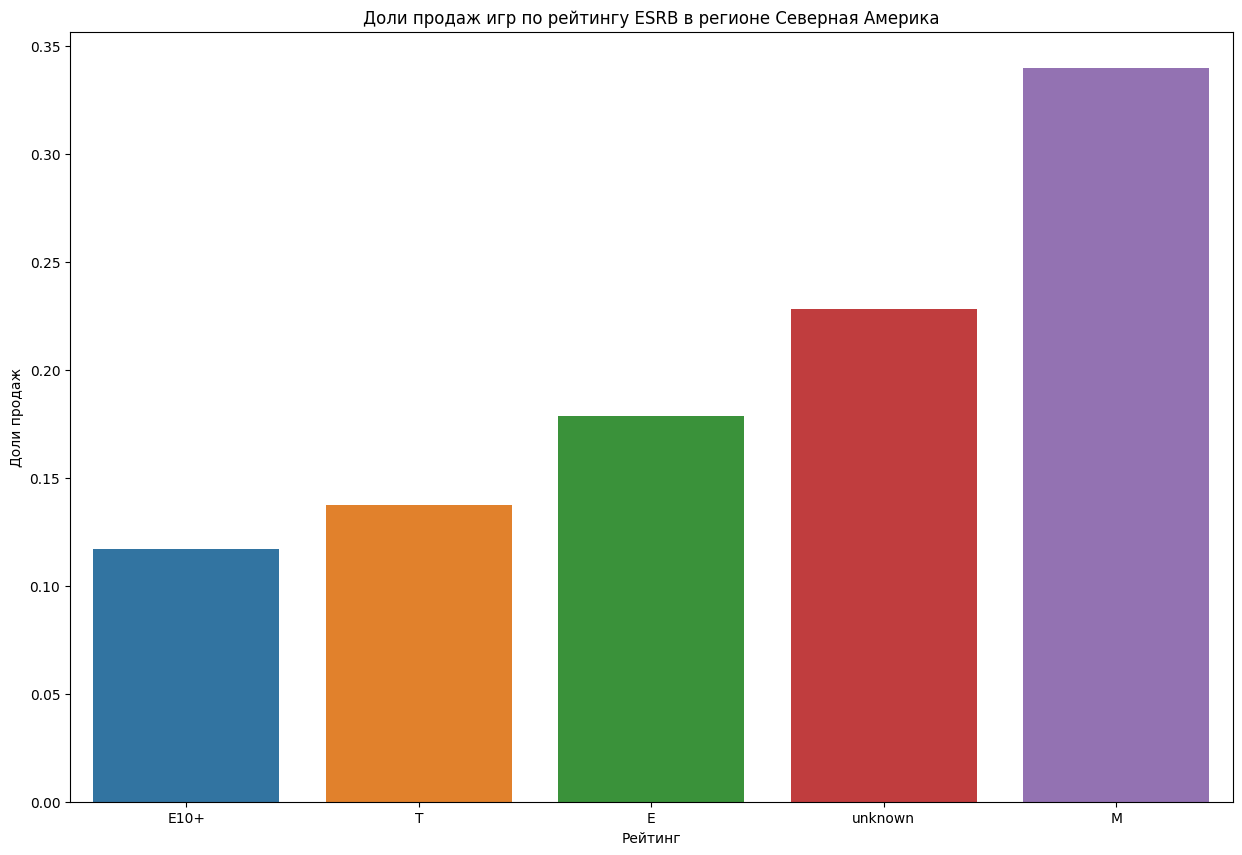

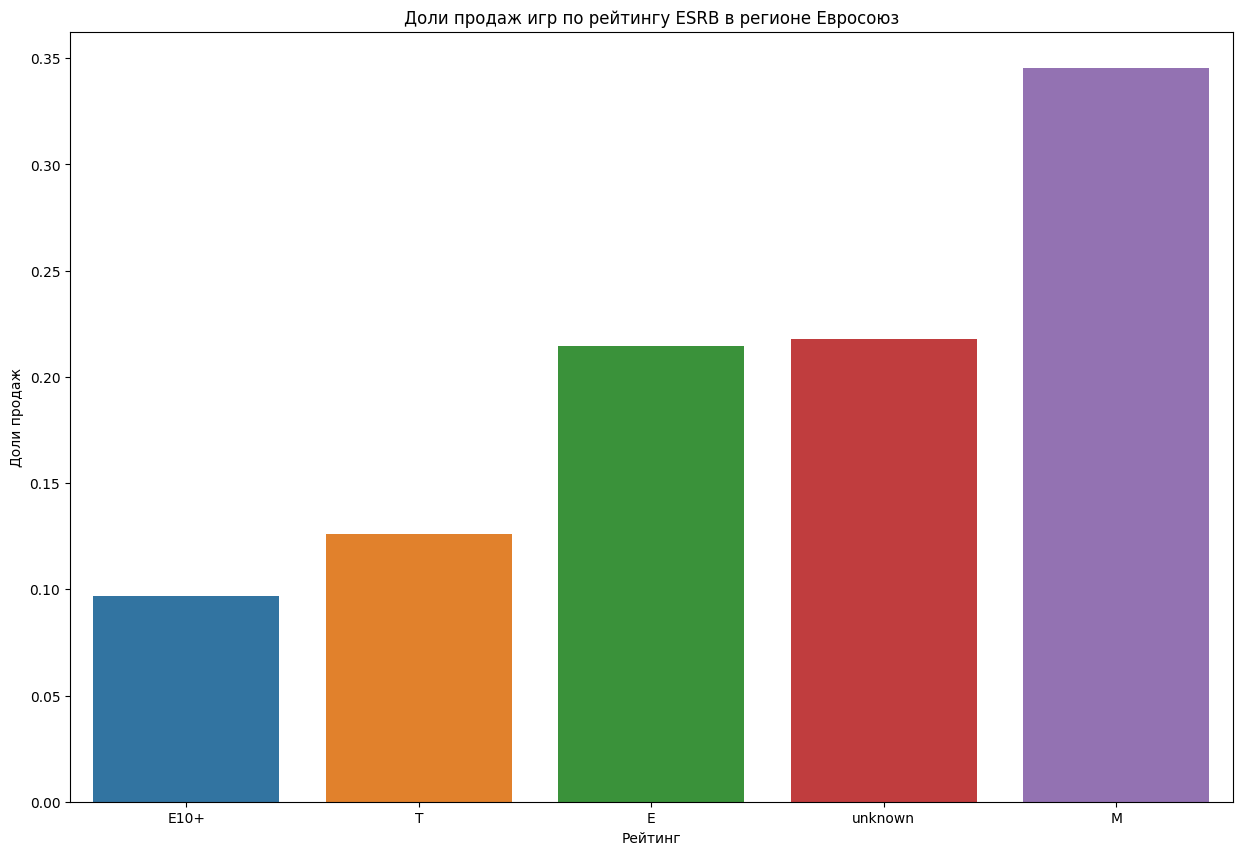

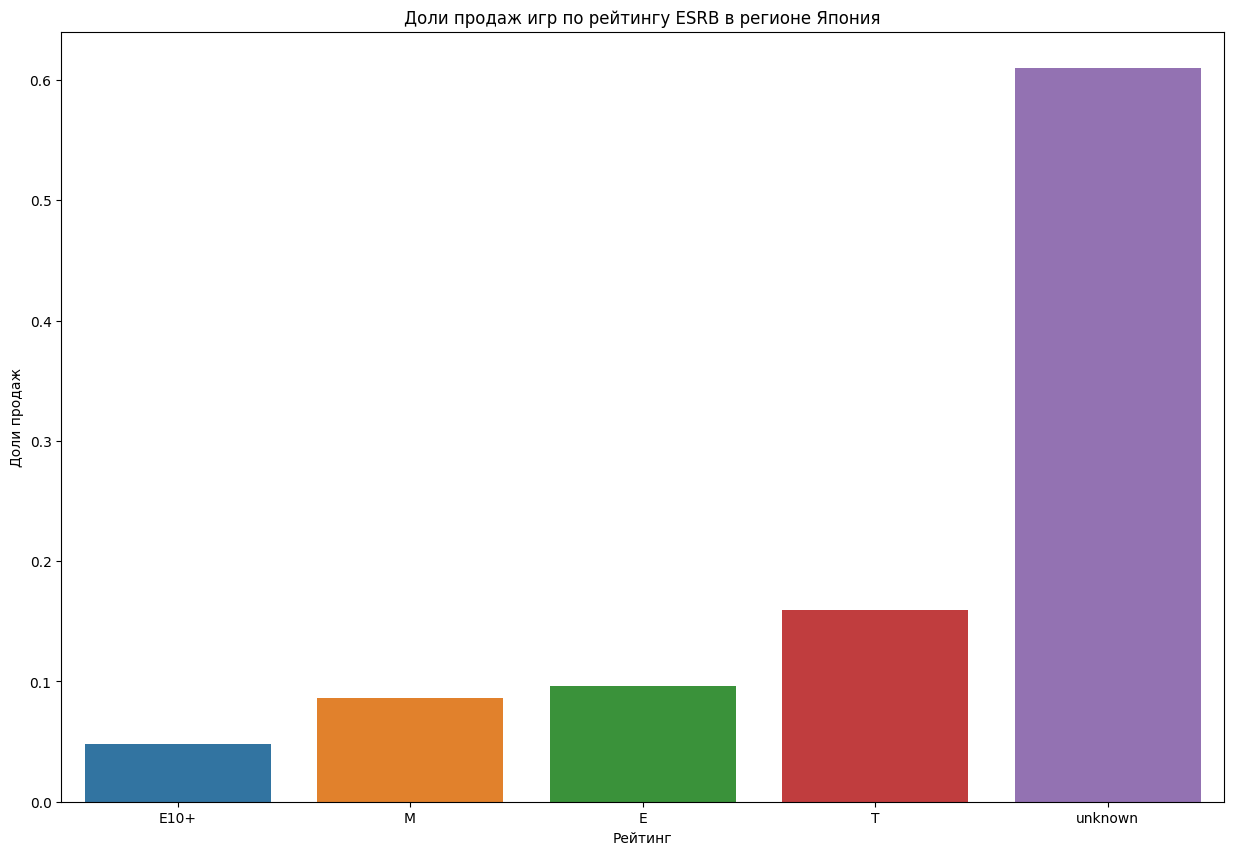

In [83]:
plt.figure(figsize=(15,10))
(sns.barplot(data=df_filt_gr_rating_reg_sales.sort_values(by='na_sales'), x='rating', y='na_sales_perc').
 set(title='Доли продаж игр по рейтингу ESRB в регионе Северная Америка', xlabel='Рейтинг',
     ylabel='Доли продаж'))
plt.show()

plt.figure(figsize=(15,10))
(sns.barplot(data=df_filt_gr_rating_reg_sales.sort_values(by='eu_sales'), x='rating', y='eu_sales_perc').
 set(title='Доли продаж игр по рейтингу ESRB в регионе Евросоюз', xlabel='Рейтинг',
     ylabel='Доли продаж'))
plt.show()

plt.figure(figsize=(15,10))
(sns.barplot(data=df_filt_gr_rating_reg_sales.sort_values(by='jp_sales'), x='rating', y='jp_sales_perc').
 set(title='Доли продаж игр по рейтингу ESRB в регионе Япония', xlabel='Рейтинг',
     ylabel='Доли продаж'))
plt.show()

In [84]:
df_filt_gr_rating_reg_sales['na_sales_perc'] = (df_filt_gr_rating_reg_sales['na_sales'] /
                                                   df_filt_gr_rating_reg_sales['na_sales'].sum())
df_filt_gr_rating_reg_sales['eu_sales_perc'] = (df_filt_gr_rating_reg_sales['eu_sales'] /
                                                   df_filt_gr_rating_reg_sales['eu_sales'].sum())
df_filt_gr_rating_reg_sales['jp_sales_perc'] = (df_filt_gr_rating_reg_sales['jp_sales'] /
                                                   df_filt_gr_rating_reg_sales['jp_sales'].sum())

df_filt_gr_rating_reg_sales

,rating,eu_sales,jp_sales,na_sales,na_sales_perc,eu_sales_perc,jp_sales_perc
0,E,58.060,8.940,50.740,0.179,0.214,0.096
1,E10+,26.160,4.460,33.230,0.117,0.097,0.048
2,M,93.440,8.010,96.420,0.339,0.345,0.086
3,T,34.070,14.780,38.950,0.137,0.126,0.159
4,unknown,58.950,56.540,64.720,0.228,0.218,0.610


Отметим следующие закономерности:
* Для региона Северная Америка и Евросоюз показатели практически идентичные. Лидируют игры с рейтингами M и E.
* Для Японии игры с рейтингом M на третьем месте и уступают по доле продаж двум другим регионам. Лидируют игры с рейтингами T и E.
* Для Японии очень много игр не имеет рейтинга ESRB, это можно связать с тем, что ESRB организация из США и либо у Японии есть свой внутренний регулятор, либо многие японские игры не получают этот рейтинг.

## Вывод

* Проанализировав продажи в разных регионах по платформам можем выделить следующие закономерности:
    * Для региона Северная Америка топ 5 платформ - 5 домашних консолей. Первое место занимает PlayStation 4 от японской компании Sony.
    * Для региона Евросоюз топ 5 платформ - 4 домашние консоли и персональный компьютер. Первое место занимает PlayStation 4 от японской компании Sony.
    * Для региона Япония топ 5 платформ - 2 портативные и 3 домашние консоли. Первое место занимает портативная консоль 3DS от японской комании Nintendo. Все 5 консолей производятся японскими компаниями Nintendo и Sony.
* Проанализировав продажи в разных регионах по жанрам можем выделить следующие закономерности:
    * Для регионов Северная Америка и Евросоюз картина очень схожая. Есть отличия в 5 месте, в Северной Америке - это Misc, в Евросоюзе - Racing.
    * Для региона Япония лидирует жанр Role-Playing, а 5 место занимает жанр Platform.
* Проанализировав влияние рейтинга ESRB на разные жанры отметим, что для Японии большая часть игра не имеет рейтинга ERSB, а  рейтинг М  уступает в продажах играм с рейтингами T и E. Для регионов Северная Америка и Евросоюз рейтинг M занимает первое место по продажам.

# Проверка гипотез

In [85]:
df_filt

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,call_of_duty:_black_ops_3,ps4,2015,shooter,6.030,5.860,0.360,2.380,NaN,NaN,unknown,14.630
1,grand_theft_auto_v,ps4,2014,action,3.960,6.310,0.380,1.970,97.000,8.300,M,12.620
2,pokemon_omega_ruby/pokemon_alpha_sapphire,3ds,2014,role-playing,4.350,3.490,3.100,0.740,NaN,NaN,unknown,11.680
3,fifa_16,ps4,2015,sports,1.120,6.120,0.060,1.280,82.000,4.300,E,8.580
4,star_wars_battlefront_(2015),ps4,2015,shooter,2.990,3.490,0.220,1.280,NaN,NaN,unknown,7.980
...,...,...,...,...,...,...,...,...,...,...,...,...
1671,strawberry_nauts,psv,2016,adventure,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010
1672,aiyoku_no_eustia,psv,2014,misc,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010
1673,samurai_warriors:_sanada_maru,ps3,2016,action,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010
1674,haitaka_no_psychedelica,psv,2016,adventure,0.000,0.000,0.010,0.000,NaN,NaN,unknown,0.010


## Гипотеза: "Средние пользовательские рейтинги платформ XBox One и PC одинаковые"

Сформулируем нулевую гипотезу:

Средние пользовательские рейтинги платформ XBox One и PC одинаковые.

Тогда двусторонняя альтернативная гипотеза:

Средние пользовательские рейтинги платформ XBox One и PC различаются.

In [86]:
print('Средний пользовательский рейтинг выборки для платформы XBox One',
      round(df_filt[df_filt['platform'] == 'xone']['user_score'].mean(), 1))
print('Средний пользовательский рейтинг выборки для платформы PC',
      round(df_filt[df_filt['platform'] == 'pc']['user_score'].mean(), 1))

Средний пользовательский рейтинг выборки для платформы XBox One 6.6
Средний пользовательский рейтинг выборки для платформы PC 6.3


In [87]:
print('Дисперсия пользовательского рейтинга выборки для платформы XBox One',
      round(np.var(df_filt[df_filt['platform'] == 'xone']['user_score'], ddof=1), 1))
print('Дисперсия пользовательского рейтинга выборки для платформы PC',
      round(np.var(df_filt[df_filt['platform'] == 'pc']['user_score'], ddof=1), 1))

Дисперсия пользовательского рейтинга выборки для платформы XBox One 1.9
Дисперсия пользовательского рейтинга выборки для платформы PC 2.9


Выполним проверку.

Используем ttest при этом заметим, что дисперсии отличаются, поэтому считать их будем отдельно для каждой выборки.

In [88]:
alpha = .05

results = st.ttest_ind(df_filt[df_filt['platform'] == 'xone']['user_score'],
                       df_filt[df_filt['platform'] == 'pc']['user_score'],
                       equal_var = False,
                      nan_policy='omit')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668943
Не получилось отвергнуть нулевую гипотезу


<b>Принимаем: не получилось отвергнуть гипотезу "Средние пользовательские рейтинги платформ XBox One и PC одинаковые".</b>

## Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные"

Сформулируем нулевую гипотезу:

Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Тогда двусторонняя альтернативная гипотеза:

Средние пользовательские рейтинги жанров Action и Sports различаются.

In [89]:
print('Средний пользовательский рейтинг выборки для жанра Action',
      round(df_filt[df_filt['genre'] == 'action']['user_score'].mean(), 1))
print('Средний пользовательский рейтинг выборки для жанра Sports',
      round(df_filt[df_filt['genre'] == 'sports']['user_score'].mean(), 1))

Средний пользовательский рейтинг выборки для жанра Action 6.8
Средний пользовательский рейтинг выборки для жанра Sports 5.2


In [90]:
print('Дисперсия пользовательского рейтинга выборки для платформы XBox One',
      round(np.var(df_filt[df_filt['genre'] == 'action']['user_score'], ddof=1), 1))
print('Дисперсия пользовательского рейтинга выборки для платформы PC',
      round(np.var(df_filt[df_filt['genre'] == 'sports']['user_score'], ddof=1), 1))

Дисперсия пользовательского рейтинга выборки для платформы XBox One 1.9
Дисперсия пользовательского рейтинга выборки для платформы PC 3.4


Выполним проверку.

Используем ttest при этом заметим, что дисперсии отличаются, поэтому считать их будем отдельно для каждой выборки.

In [91]:
alpha = .05

results = st.ttest_ind(df_filt[df_filt['genre'] == 'action']['user_score'],
                       df_filt[df_filt['genre'] == 'sports']['user_score'],
                       equal_var = False,
                      nan_policy='omit')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.182555038264477e-14
Отвергаем нулевую гипотезу


<b>Принимаем: cредние пользовательские рейтинги жанров Action и Sports различаются.</b>

In [92]:
df_filt['platform'].unique()

array(['ps4', '3ds', 'xone', 'wiiu', 'ps3', 'x360', 'pc', 'wii', 'psv'],
      dtype=object)

## Выводы

Проверены следующие гипотезы:

* Средние пользовательские рейтинги платформ XBox One и PC одинаковые.
    * Нулевая гипотеза: средние пользовательские рейтинги платформ XBox One и PC одинаковые.
    * Двусторонняя альтернативная гипотеза: средние пользовательские рейтинги платформ XBox One и PC различаются.
    * Нулевая гипотеза не может быть отвергнута.
    * <b>Вывод: не получилось отвергнуть гипотезу "Средние пользовательские рейтинги платформ XBox One и PC одинаковые".</b>
* Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
    * Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.
    * Двусторонняя альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports различаются.
    * Нулевая гипотеза отвергнута.
    * <b>Вывод: средние пользовательские рейтинги жанров Action и Sports различаются.</b>

# Вывод

Заказчик - интернет-магазин, продающий по всему миру компьютерные игры. Были получены исторические данные из открытых источников о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation) игр. Нужно выявить определяющие успешность игры закономерности для определения потенциально популярного продукта и планировки рекламных кампаний.
<b>Был получены:</b>
* Датасет с историческими данными из открытых источников о продажах игр, оценках пользователей и экспертов, жанрах и платформах игр.

<b>Необходимо было определить:</b>
* Определяющие успешность игры закономерности.

<b>Была выполнена предобработка данных:</b>
* Названия столбцов приведены к нижнему регистру.
* TBD в столбце 'user_score' заменен на np.NaN.
* Обработаны пропуски, добавлено значение-заглушка 'unknown' в столбце 'rating'.
* Изменены типы данные:
    * В столбце 'year_of_release' float на int;
    * В столбце 'user_score' obj на float.
* Выполнена првоерка на полные и неявные дубликаты, дубликаты обработаны.
* Создан столбец с суммарными глобальными продажами игр.

<b>Был выполнен исследовательский анализ данных:</b>
* Определен актуальный период: 2014-2016 года.
* Были определены актуальные на 2016 год платформы выпуска игр ('wii', 'x360', 'ps3', 'ps4', '3ds', 'pc', 'xone', 'wiiu', 'psv').
* Были определены наиболее перспективные платформы для выпуска игр:
    * PlayStation 4;
    * XBox One.
* Были определены наиболее перспективные жанры:
    * Shooter;
    * Sports;
    * Platform.
* Было установлено, что:
    * Игр жанра platform выходит мало и там меньше конкуренция;
    * По медианным продажам жанр shooter более чем в два раза обгоняет конкурентов;
    * Для разных платформ наиболее перспективные жанры могут меняться и при выборе платформы и жанра следует уточнять данные.
* Было определено, что:
    * У оценок критиков положительная корелляция с продажами на всех платформах. Наибольшая у: XBox 360, PlayStation 3, XBox One, PlayStation 4.
    * У оценок пользователей корелляция с продажами на всех платформах есть как положительная так и практически нулевая. Есть значимая положительная корелляция для платформ Nintendo WiiU, Nintendo 3DS.

<b>Были определены следующие закономерности для пользователей разных регионов.</b>
* По платформам    
    * Для региона Северная Америка топ 5 платформ - 5 домашних консолей. Первое место занимает PlayStation 4 от японской компании Sony.
    * Для региона Евросоюз топ 5 платформ - 4 домашние консоли и персональный компьютер. Первое место занимает PlayStation 4 от японской компании Sony.
    * Для региона Япония топ 5 платформ - 2 портативные и 3 домашние консоли. Первое место занимает портативная консоль 3DS от японской комании Nintendo. Все 5 консолей производятся японскими компаниями Nintendo и Sony.
* По жанрам:
    * Для регионов Северная Америка и Евросоюз картина очень схожая. Есть отличия в 5 месте, в Северной Америке - это Misc, в Евросоюзе - Racing.
    * Для региона Япония лидирует жанр Role-Playing, а 5 место занимает жанр Platform.
* Для Японии большая часть игра не имеет рейтинга ERSB, а  рейтинг М  уступает в продажах играм с рейтингами T и E. Для регионов Северная Америка и Евросоюз рейтинг M занимает первое место по продажам.

<b>Были проверены гипотезы и получены следующие выводы.</b>
* Не получилось отвергнуть гипотезу "Средние пользовательские рейтинги платформ XBox One и PC одинаковые".
* Средние пользовательские рейтинги жанров Action и Sports различаются.